In [8]:
##GSE161529 data anlysis
import os
import tarfile

# Update to your correct local path
tar_path = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW.tar")
extract_path = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")

# Create the output directory if not already there
os.makedirs(extract_path, exist_ok=True)

# Extract TAR contents
with tarfile.open(tar_path, "r") as tar:
    tar.extractall(path=extract_path)

# Check contents
print("Extracted files:")
print(os.listdir(extract_path)[:10])

Extracted files:
['GSM4909305_ER-MH0029-7C-matrix.mtx.gz', 'GSM4909319_mER-PM0178-matrix.mtx.gz', 'GSM4909304_ER-MH0163-matrix.mtx.gz', 'GSM4909261_N-PM0230-Total-barcodes.tsv.gz', 'GSM4909275_N-PM0372-Epi-barcodes.tsv.gz', 'GSM4909302_ER-MH0025-matrix.mtx.gz', 'GSM4909258_N-NF-Epi-barcodes.tsv.gz', 'GSM4909314_ER-MH0064-LN-matrix.mtx.gz', 'GSM4909272_N-MH0021-Total-barcodes.tsv.gz', 'GSM4909286_TN-B1-MH0131-matrix.mtx.gz']


In [2]:
import scanpy as sc
import os

# Define paths
data_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/")
sample_prefix = "GSM4909305_ER-MH0029-7C"

raw_data_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")
for f in sorted(os.listdir(raw_data_dir)):
    print(f)

GSM4909253_N-PM0092-Total-barcodes.tsv.gz
GSM4909253_N-PM0092-Total-matrix.mtx.gz
GSM4909254_N-PM0019-Total-barcodes.tsv.gz
GSM4909254_N-PM0019-Total-matrix.mtx.gz
GSM4909255_N-N280-Epi-barcodes.tsv.gz
GSM4909255_N-N280-Epi-matrix.mtx.gz
GSM4909256_N-PM0095-Epi-barcodes.tsv.gz
GSM4909256_N-PM0095-Epi-matrix.mtx.gz
GSM4909257_N-PM0095-Total-barcodes.tsv.gz
GSM4909257_N-PM0095-Total-matrix.mtx.gz
GSM4909258_N-NF-Epi-barcodes.tsv.gz
GSM4909258_N-NF-Epi-matrix.mtx.gz
GSM4909259_N-NE-Epi-barcodes.tsv.gz
GSM4909259_N-NE-Epi-matrix.mtx.gz
GSM4909260_N-N1105-Epi-barcodes.tsv.gz
GSM4909260_N-N1105-Epi-matrix.mtx.gz
GSM4909261_N-PM0230-Total-barcodes.tsv.gz
GSM4909261_N-PM0230-Total-matrix.mtx.gz
GSM4909262_N-MH0064-Epi-barcodes.tsv.gz
GSM4909262_N-MH0064-Epi-matrix.mtx.gz
GSM4909263_N-MH0064-Total-barcodes.tsv.gz
GSM4909263_N-MH0064-Total-matrix.mtx.gz
GSM4909264_N-N1B-Epi-barcodes.tsv.gz
GSM4909264_N-N1B-Epi-matrix.mtx.gz
GSM4909265_N-PM0233-Total-barcodes.tsv.gz
GSM4909265_N-PM0233-Total-matr

In [2]:
import scanpy as sc
import pandas as pd
import os
import anndata as ad
# Paths
data_dir = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_RAW")
features_path = os.path.expanduser("~/Desktop/Capstone/Raw data 2/GSE161529_features.tsv.gz")

# Load function
def load_sample(sample_prefix, data_dir, features_path):
    matrix_fp = os.path.join(data_dir, f"{sample_prefix}-matrix.mtx.gz")
    barcodes_fp = os.path.join(data_dir, f"{sample_prefix}-barcodes.tsv.gz")

    adata = sc.read_mtx(matrix_fp).T
    features = pd.read_csv(features_path, sep="\t", header=None)
    barcodes = pd.read_csv(barcodes_fp, header=None)

    adata.var_names = features[0].astype(str)
    adata.obs_names = barcodes[0].astype(str)
    adata.var_names_make_unique()
    adata.obs["sample"] = sample_prefix

    return adata

# Get all sample prefixes
all_files = os.listdir(data_dir)
sample_prefixes = sorted(set(f.split("-matrix")[0] for f in all_files if f.endswith("-matrix.mtx.gz")))

# Load all samples
adatas = []
for prefix in sample_prefixes:
    try:
        ad = load_sample(prefix, data_dir, features_path)
        adatas.append(ad)
        print(f"✅ Loaded: {prefix} with {ad.n_obs} cells")
    except Exception as e:
        print(f"❌ Failed to load {prefix}: {e}")
# Concatenate all into one AnnData
adata_all = adatas[0].concatenate(adatas[1:], join="outer", batch_key="sample_id", batch_categories=sample_prefixes)
print(adata_all.obs.head(2))
# Recompute QC metrics
adata_all.obs["nCount_RNA"] = adata_all.X.sum(axis=1).A1

adata_all.obs.head(2)

✅ Loaded: GSM4909253_N-PM0092-Total with 4966 cells
✅ Loaded: GSM4909254_N-PM0019-Total with 7130 cells
✅ Loaded: GSM4909255_N-N280-Epi with 1198 cells
✅ Loaded: GSM4909256_N-PM0095-Epi with 9879 cells
✅ Loaded: GSM4909257_N-PM0095-Total with 7412 cells
✅ Loaded: GSM4909258_N-NF-Epi with 3015 cells
✅ Loaded: GSM4909259_N-NE-Epi with 3089 cells
✅ Loaded: GSM4909260_N-N1105-Epi with 5201 cells
✅ Loaded: GSM4909261_N-PM0230-Total with 3443 cells
✅ Loaded: GSM4909262_N-MH0064-Epi with 4785 cells
✅ Loaded: GSM4909263_N-MH0064-Total with 1678 cells
✅ Loaded: GSM4909264_N-N1B-Epi with 2157 cells
✅ Loaded: GSM4909265_N-PM0233-Total with 5665 cells
✅ Loaded: GSM4909266_N-MH0169-Total with 4605 cells
✅ Loaded: GSM4909267_N-MH0023-Epi with 3037 cells
✅ Loaded: GSM4909268_N-MH0023-Total with 7371 cells
✅ Loaded: GSM4909269_N-PM0342-Epi with 7856 cells
✅ Loaded: GSM4909270_N-PM0342-Total with 10178 cells
✅ Loaded: GSM4909271_N-MH288-Total with 2320 cells
✅ Loaded: GSM4909272_N-MH0021-Total with 246

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/3374298775.py:39: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_all = adatas[0].concatenate(adatas[1:], join="outer", batch_key="sample_id", batch_categories=sample_prefixes)


                                                                 sample  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   

                                                              sample_id  
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total  
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total  


sample  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   

                                                              sample_id  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  GSM4909253_N-PM0092-Total   

                                              nCount_RNA  
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total      3587.0  
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total      1003.0

In [3]:
# Print some gene names to inspect
print(adata_all.var_names[:10])


Index(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000239906',
       'ENSG00000241599', 'ENSG00000236601', 'ENSG00000284733',
       'ENSG00000235146'],
      dtype='object')


In [ ]:
## Checking if the new updated csv works
# import pandas as pd

# Load the prediction CSV generated in Colab
# df_val_clean = pd.read_csv(
#     "~/Desktop/Capstone/Notebook recent/GSE161529_predictions_nomito.csv",
#     index_col=0
# )

# df_val_clean = pd.read_csv(
#     "~/Desktop/Capstone/Notebook recent/GSE161529_predictions_16July_revised.csv",
#     index_col=0
# )
# df_val_clean = pd.read_csv(
#     "~/Desktop/Capstone/Notebook recent/GSE161529_predictions_17July_revised_cnv.csv",
#     index_col=0
# )





In [5]:
for name in adata_all.obs_names[:10]:
    print(name)

AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total
AAACCTGTCAAGGTAA-1-GSM4909253_N-PM0092-Total
AAACGGGAGAGGTAGA-1-GSM4909253_N-PM0092-Total
AAACGGGAGATGGCGT-1-GSM4909253_N-PM0092-Total
AAACGGGAGATTACCC-1-GSM4909253_N-PM0092-Total
AAACGGGAGCACCGCT-1-GSM4909253_N-PM0092-Total


In [6]:
# Extract the base cell ID before the first two dashes (e.g., "AAACCTGAGACTAGGC-1")
# Split on dash and rejoin first two parts
adata_all.obs["cell_id_short"] = adata_all.obs_names.str.split("-").str[:2].str.join("-")

print(adata_all.obs["cell_id_short"].head())



AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total    AAACCTGAGACTAGGC-1
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total    AAACCTGAGGACAGAA-1
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total    AAACCTGAGGATGTAT-1
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total    AAACCTGCAAGAGGCT-1
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total    AAACCTGGTAGCTTGT-1
Name: cell_id_short, dtype: object


In [9]:
import pandas as pd

# ✅ Specify index_col=0 to use cell barcodes as index
# df_val_clean = pd.read_csv(
#    "~/Desktop/Capstone/Notebook recent/GSE161529_predictions_16July_revised_cnv.csv",
#    index_col=0
# )
df_val_clean = pd.read_csv(
   "~/Desktop/Capstone/Notebook recent/GSE161529_predictions_17July_revised_cnv.csv",
   index_col=0
)
#df_val_clean = df_val_clean.read_csv(f"{assets}/GSE161529/GSE161529_predictions_cnv.csv", index=True)
# Set cell barcodes as index
df_val_clean = df_val_clean.set_index("Unnamed: 0")

# Confirm
print(df_val_clean.index[:5].tolist())

['AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total', 'AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total', 'AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total', 'AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total', 'AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total']


In [10]:
# Extract short cell ID (cell-barcode-1) from long index
df_val_clean["cell_id_short"] = df_val_clean.index.str.split("-").str[:2].str.join("-")

# Set as index
df_val_clean = df_val_clean.set_index("cell_id_short")

# Confirm it's fixed
print(df_val_clean.index[:5].tolist())


['AAACCTGAGACTAGGC-1', 'AAACCTGAGGACAGAA-1', 'AAACCTGAGGATGTAT-1', 'AAACCTGCAAGAGGCT-1', 'AAACCTGGTAGCTTGT-1']


In [11]:
# Make sure obs index matches short cell IDs
adata_all.obs["cell_id_short"] = adata_all.obs_names.str.split("-").str[:2].str.join("-")

# Features to map
cols_to_map = [
    "tumor_pred_mito", "tumor_prob_mito", "tumor_pred_label_mito",
    "nCount_RNA", "pct_counts_ribo", "oxphos_score", "apoptosis_score",
    "S_score", "G2M_score", "proto_oncogenescore", "cnv_score"
]
# Drop duplicates (keep the first occurrence)
df_val_clean = df_val_clean[~df_val_clean.index.duplicated(keep="first")]


# Map from df_val_clean using the short index
for col in cols_to_map:
    adata_all.obs[col] = adata_all.obs["cell_id_short"].map(df_val_clean[col])

print("✅ Successfully mapped predictions and features into adata_all.obs.")


✅ Successfully mapped predictions and features into adata_all.obs.


In [12]:
# Deduplicate df_val_clean before mapping
df_val_clean = df_val_clean[~df_val_clean.index.duplicated(keep='first')]

# Now safely map
for col in cols_to_map:
    adata_all.obs[col] = adata_all.obs["cell_id_short"].map(df_val_clean[col])

print("✅ Successfully mapped predictions and features into adata_all.obs (after deduplication).")
dup_count = df_val_clean.index.duplicated().sum()
print(f"❗ Removed {dup_count} duplicate entries from df_val_clean.")


✅ Successfully mapped predictions and features into adata_all.obs (after deduplication).
❗ Removed 0 duplicate entries from df_val_clean.


In [13]:
# Make sure obs index matches short cell IDs
adata_all.obs["cell_id_short"] = adata_all.obs_names.str.split("-").str[:2].str.join("-")

# Features to map
cols_to_map = [
    "tumor_pred_mito", "tumor_prob_mito", "tumor_pred_label_mito",
    "nCount_RNA", "pct_counts_ribo", "oxphos_score", "apoptosis_score",
    "S_score", "G2M_score", "proto_oncogenescore", "cnv_score"
]

# Map from df_val_clean using the short index
for col in cols_to_map:
    adata_all.obs[col] = adata_all.obs["cell_id_short"].map(df_val_clean[col])

print("✅ Successfully mapped predictions and features into adata_all.obs.")

✅ Successfully mapped predictions and features into adata_all.obs.


In [14]:
# Restore full obs_names as the index
adata_all.obs.index = adata_all.obs_names
# Make a short ID column to match df_val_clean
adata_all.obs["cell_id_short"] = adata_all.obs_names.str.split("-").str[:2].str.join("-")

# Map predictions from df_val_clean
adata_all.obs["tumor_pred_mito"] = adata_all.obs["cell_id_short"].map(df_val_clean["tumor_pred_mito"])
adata_all.obs["tumor_prob_mito"] = adata_all.obs["cell_id_short"].map(df_val_clean["tumor_prob_mito"])
adata_all.obs["tumor_pred_label_mito"] = adata_all.obs["cell_id_short"].map(df_val_clean["tumor_pred_label_mito"])

print("✅ Successfully mapped predictions into adata_all.obs using cell_id_short")

✅ Successfully mapped predictions into adata_all.obs using cell_id_short


In [15]:
dups = df_val_clean.index[df_val_clean.index.duplicated()]
print(f"❗ Duplicate index entries in df_val_clean: {len(dups)}")
# Step 1: Remove duplicates (keep first occurrence)
df_val_clean_dedup = df_val_clean[~df_val_clean.index.duplicated(keep="first")]

# Step 2: Map predictions safely
adata_all.obs["tumor_pred_mito"] = adata_all.obs["cell_id_short"].map(df_val_clean_dedup["tumor_pred_mito"])
adata_all.obs["tumor_prob_mito"] = adata_all.obs["cell_id_short"].map(df_val_clean_dedup["tumor_prob_mito"])
adata_all.obs["tumor_pred_label_mito"] = adata_all.obs["cell_id_short"].map(df_val_clean_dedup["tumor_pred_label_mito"])

# Step 3: Confirm success
print("✅ Mapped predictions into adata_all.obs using deduplicated df_val_clean")
print(adata_all.obs[["cell_id_short", "tumor_pred_label_mito"]].dropna().head())

❗ Duplicate index entries in df_val_clean: 0
✅ Mapped predictions into adata_all.obs using deduplicated df_val_clean
                                                   cell_id_short  \
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total  AAACCTGAGACTAGGC-1   
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total  AAACCTGAGGACAGAA-1   
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total  AAACCTGAGGATGTAT-1   
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total  AAACCTGCAAGAGGCT-1   
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total  AAACCTGGTAGCTTGT-1   

                                             tumor_pred_label_mito  
AAACCTGAGACTAGGC-1-GSM4909253_N-PM0092-Total       Predicted Tumor  
AAACCTGAGGACAGAA-1-GSM4909253_N-PM0092-Total       Predicted Tumor  
AAACCTGAGGATGTAT-1-GSM4909253_N-PM0092-Total       Predicted Tumor  
AAACCTGCAAGAGGCT-1-GSM4909253_N-PM0092-Total       Predicted Tumor  
AAACCTGGTAGCTTGT-1-GSM4909253_N-PM0092-Total       Predicted Tumor  


In [16]:
adata_all.obs["tumor_pred_label_mito"].value_counts()


tumor_pred_label_mito
Predicted Tumor     410590
Predicted Normal     17434
Name: count, dtype: int64

In [17]:
print("🔢 Tumor prediction counts:")
print(adata_all.obs["tumor_pred_label_mito"].value_counts())
features = [
    "nCount_RNA", "pct_counts_ribo", "oxphos_score", "apoptosis_score",
    "S_score", "G2M_score", "proto_oncogenescore", "cnv_score", "tumor_prob_mito"
]

summary_df = adata_all.obs.groupby("tumor_pred_label_mito")[features].mean().T.round(3)
display(summary_df)

🔢 Tumor prediction counts:
tumor_pred_label_mito
Predicted Tumor     410590
Predicted Normal     17434
Name: count, dtype: int64


tumor_pred_label_mito  Predicted Normal  Predicted Tumor
nCount_RNA                     1134.883         5757.947
pct_counts_ribo                  25.500           23.459
oxphos_score                      0.105            0.755
apoptosis_score                  -0.022            0.008
S_score                          -0.048           -0.258
G2M_score                        -0.050           -0.213
proto_oncogenescore               0.066            0.504
cnv_score                         0.009            0.035
tumor_prob_mito                   0.258            0.968

In [18]:
import gzip
import pandas as pd
import os
# Path to GTF file
#gtf_path = "~/Desktop/Capstone/Notebook recent/gencode.v44.annotation.gtf.gz"


gtf_path = os.path.expanduser("~/Desktop/Capstone/Notebook recent/gencode.v44.annotation.gtf.gz")


# Parse GTF and build Ensembl-to-gene name map
gene_map = {}
with gzip.open(gtf_path, "rt") as f:
    for line in f:
        if line.startswith("#"):
            continue
        fields = line.strip().split("\t")
        if fields[2] != "gene":
            continue
        info = fields[8]
        gene_id = None
        gene_name = None
        for entry in info.split(";"):
            entry = entry.strip()
            if entry.startswith("gene_id"):
                gene_id = entry.split(" ")[1].replace('"', "")
            elif entry.startswith("gene_name"):
                gene_name = entry.split(" ")[1].replace('"', "")
        if gene_id and gene_name:
            gene_map[gene_id.split(".")[0]] = gene_name

# Clean Ensembl IDs in adata_all.var
adata_all.var["ensembl_clean"] = adata_all.var_names.str.split(".").str[0]

# Map gene names
adata_all.var["gene_name"] = adata_all.var["ensembl_clean"].map(gene_map)

# Fill in 'Unknown' where missing
adata_all.var["gene_name"] = adata_all.var["gene_name"].fillna("Unknown")

# Create unique var_names based on gene names
adata_all.var_names = adata_all.var["gene_name"] + "_" + adata_all.var["ensembl_clean"]
adata_all.var_names_make_unique()

print("Gene names successfully mapped and set as var_names.")
print("Sample gene names:", adata_all.var_names[:10].tolist())


Gene names successfully mapped and set as var_names.
Sample gene names: ['MIR1302-2HG_ENSG00000243485', 'FAM138A_ENSG00000237613', 'OR4F5_ENSG00000186092', 'ENSG00000238009_ENSG00000238009', 'ENSG00000239945_ENSG00000239945', 'ENSG00000239906_ENSG00000239906', 'ENSG00000241599_ENSG00000241599', 'ENSG00000236601_ENSG00000236601', 'OR4F29_ENSG00000284733', 'ENSG00000235146_ENSG00000235146']


In [19]:
# Canonical oncogenes and tumor suppressors both in this block
genes_of_interest = [
    # ✅ Oncogenes
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2",
    
    # ✅ Tumor Suppressors
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]

# Check which of these genes are now found in adata_all
valid_genes = [g for g in genes_of_interest if any(g in name for name in adata_all.var_names)]
print(f"✅ Found {len(valid_genes)} gene(s): {valid_genes}")


✅ Found 40 gene(s): ['MYC', 'EGFR', 'ERBB2', 'CCND1', 'BCL2', 'PIK3CA', 'AKT1', 'KRAS', 'NRAS', 'HRAS', 'MDM2', 'FGFR1', 'FGFR2', 'MET', 'CDK4', 'CDK6', 'SRC', 'NOTCH1', 'NTRK1', 'NTRK2', 'TP53', 'RB1', 'BRCA1', 'BRCA2', 'CDKN2A', 'CDKN1A', 'PTEN', 'SMAD4', 'ATM', 'ATR', 'CHEK2', 'NF1', 'NF2', 'STK11', 'VHL', 'WT1', 'FOXO3', 'BAX', 'CASP8', 'TSC2']


In [20]:
print(adata_all.var_names[:10].tolist())

['MIR1302-2HG_ENSG00000243485', 'FAM138A_ENSG00000237613', 'OR4F5_ENSG00000186092', 'ENSG00000238009_ENSG00000238009', 'ENSG00000239945_ENSG00000239945', 'ENSG00000239906_ENSG00000239906', 'ENSG00000241599_ENSG00000241599', 'ENSG00000236601_ENSG00000236601', 'OR4F29_ENSG00000284733', 'ENSG00000235146_ENSG00000235146']


In [21]:
# ✅ Step 0: Inspect current .var structure (optional but helpful)
print("📋 Columns in adata_all.var:", adata_all.var.columns.tolist())

# ✅ Step 1: If 'ensembl_id' column is missing, extract it from the index
if "ensembl_id" not in adata_all.var.columns:
    adata_all.var["ensembl_id"] = adata_all.var.index.astype(str)

# ✅ Step 2: Handle missing gene names
adata_all.var["gene_name"] = adata_all.var["gene_name"].fillna("Unknown")

# ✅ Step 3: Combine gene_name and ensembl_id to make unique names
adata_all.var["gene_name_combined"] = adata_all.var["gene_name"] + "_" + adata_all.var["ensembl_id"]

# ✅ Step 4: Assign as var_names
adata_all.var_names = adata_all.var["gene_name_combined"]
adata_all.var_names_make_unique()

# ✅ Step 5: Confirm
print("🔎 Sample gene names:", adata_all.var_names[:10].tolist())


📋 Columns in adata_all.var: ['ensembl_clean', 'gene_name']
🔎 Sample gene names: ['MIR1302-2HG_MIR1302-2HG_ENSG00000243485', 'FAM138A_FAM138A_ENSG00000237613', 'OR4F5_OR4F5_ENSG00000186092', 'ENSG00000238009_ENSG00000238009_ENSG00000238009', 'ENSG00000239945_ENSG00000239945_ENSG00000239945', 'ENSG00000239906_ENSG00000239906_ENSG00000239906', 'ENSG00000241599_ENSG00000241599_ENSG00000241599', 'ENSG00000236601_ENSG00000236601_ENSG00000236601', 'OR4F29_OR4F29_ENSG00000284733', 'ENSG00000235146_ENSG00000235146_ENSG00000235146']


In [22]:
# Use 'gene_name' and 'ensembl_clean' for better formatting
adata_all.var["gene_name_combined"] = adata_all.var["gene_name"].astype(str) + "_" + adata_all.var["ensembl_clean"].astype(str)

# Set these combined names as var_names
adata_all.var_names = adata_all.var["gene_name_combined"]
adata_all.var_names_make_unique()

# Preview
print("🔎 Cleaned sample gene names:", adata_all.var_names[:10].tolist())


🔎 Cleaned sample gene names: ['MIR1302-2HG_ENSG00000243485', 'FAM138A_ENSG00000237613', 'OR4F5_ENSG00000186092', 'ENSG00000238009_ENSG00000238009', 'ENSG00000239945_ENSG00000239945', 'ENSG00000239906_ENSG00000239906', 'ENSG00000241599_ENSG00000241599', 'ENSG00000236601_ENSG00000236601', 'OR4F29_ENSG00000284733', 'ENSG00000235146_ENSG00000235146']


In [23]:
# Strip Ensembl suffix from gene names
adata_all.var_names = adata_all.var_names.str.split('_').str[0]
adata_all.var["gene_symbol"] = adata_all.var_names
adata_all.var_names_make_unique()


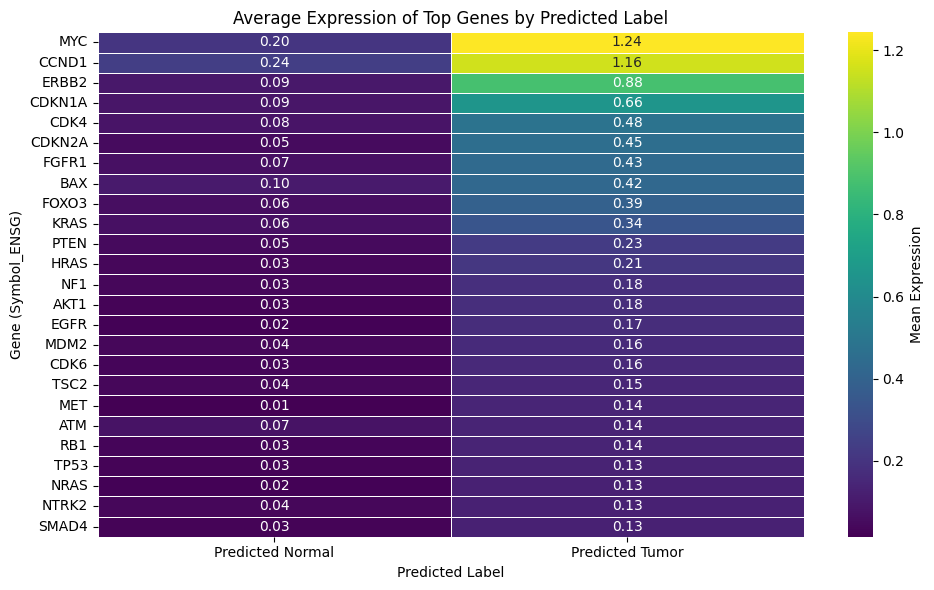

In [24]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define genes of interest
oncogenes = [
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2"
]
tumor_suppressors = [
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]
genes_of_interest = oncogenes + tumor_suppressors

# Step 2: Match genes to adata_all.var_names (formatted like 'TP53_ENSG...')
genes_matched = [g for g in adata_all.var_names if g.split("_")[0] in genes_of_interest]

# Step 3: Create DataFrame of expression values
X = adata_all[:, genes_matched].to_df()
X["tumor_label"] = adata_all.obs["tumor_pred_label_mito"].values

# Step 4: Compute mean expression in tumor cells and sort genes
means = X.groupby("tumor_label").mean()
tumor_means = means.loc["Predicted Tumor"]
sorted_genes = tumor_means.sort_values(ascending=False).index.tolist()

# Optional: top N genes
top_n = 25
top_genes = sorted_genes[:top_n]

# Step 5: Plot summary heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    means[top_genes].T,  # transpose for genes as rows
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Mean Expression"}
)
plt.title("Average Expression of Top Genes by Predicted Label")
plt.xlabel("Predicted Label")
plt.ylabel("Gene (Symbol_ENSG)")
plt.tight_layout()
plt.show()

✅ Differentially expressed oncogenes (p < 0.05):


gene        p_value   log2_fc
0     NRAS   0.000000e+00  2.477481
20    PTEN   0.000000e+00  2.287256
22    KRAS   0.000000e+00  2.430216
23    CDK4   0.000000e+00  2.560410
24    MDM2   0.000000e+00  2.100565
26     RB1   0.000000e+00  2.074938
27    AKT1   0.000000e+00  2.619605
28    TSC2   0.000000e+00  2.064067
29    TP53   0.000000e+00  2.227463
30     NF1   0.000000e+00  2.402316
31   ERBB2   0.000000e+00  3.260088
33   SMAD4   0.000000e+00  2.224890
34    BCL2   0.000000e+00  1.738251
35     SRC   0.000000e+00  2.552239
36   STK11   0.000000e+00  2.283810
37     BAX   0.000000e+00  2.080420
38   CHEK2   0.000000e+00  2.741095
18   CCND1   0.000000e+00  2.274646
39     NF2   0.000000e+00  2.430888
16    HRAS   0.000000e+00  2.593708
2    CASP8   0.000000e+00  1.804010
3      VHL   0.000000e+00  2.254428
4      ATR   0.000000e+00  2.249673
5   PIK3CA   0.000000e+00  2.354897
6   CDKN1A   0.000000e+00  2.916505
7    FOXO3   0.000000e+00  2.645694
9     CDK6   0.000000e+00  2.351542
8     EGFR   0.000000e+00  3.021959
11   FGFR1   0.000000e+00  2.723209
12     MYC   0.000000e+00  2.618363
13  CDKN2A   0.000000e+00  3.184546
15  NOTCH1   0.000000e+00  2.028153
10     MET   0.000000e+00  3.249633
32   BRCA1  6.134444e-310  2.599673
14   NTRK2  4.970220e-269  1.845073
25   BRCA2  2.219567e-243  2.428688
19     ATM  2.646636e-147  0.903621
21   FGFR2  1.280855e-123  1.742862
17     WT1   1.302410e-46  3.432435
1    NTRK1   1.305116e-11  2.017507

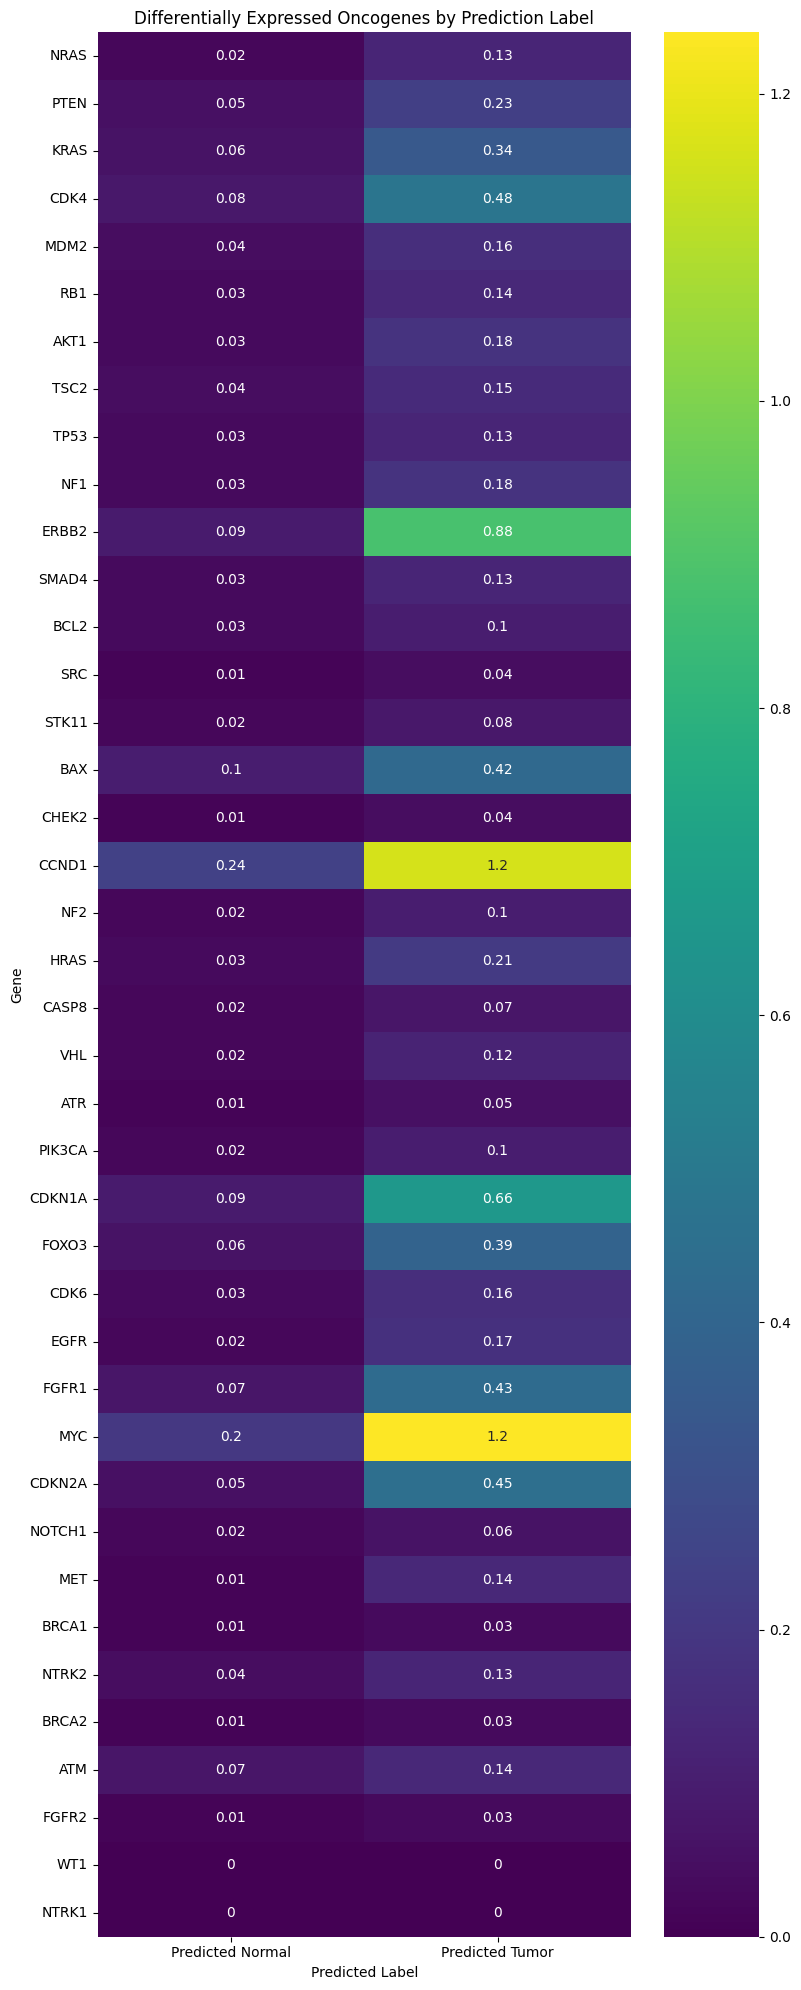

In [25]:
import numpy as np
import pandas as pd
import scanpy as sc
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Define genes of interest
oncogenes = [
    # Oncogenes only
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK1", "NTRK2"
]
tumor_suppressors = [
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]
genes_of_interest = oncogenes + tumor_suppressors
# Adjust names to match format in var_names
genes_to_test = [gene for gene in adata_all.var_names if gene.split("_")[0] in genes_of_interest]

# Group labels
labels = adata_all.obs["tumor_pred_label_mito"]

# Perform t-test and log2 fold change
results = []
for gene in genes_to_test:
    tumor_vals = adata_all[labels == "Predicted Tumor", gene].X.toarray().flatten()
    normal_vals = adata_all[labels == "Predicted Normal", gene].X.toarray().flatten()
    
    # Avoid divide-by-zero or invalid mean
    if tumor_vals.size > 1 and normal_vals.size > 1:
        t_stat, p_val = ttest_ind(tumor_vals, normal_vals, equal_var=False)
        mean_diff = tumor_vals.mean() - normal_vals.mean()
        log2_fc = np.log2((tumor_vals.mean() + 1e-5) / (normal_vals.mean() + 1e-5))
        results.append((gene, p_val, log2_fc, mean_diff))

# Create DataFrame and filter
df_de = pd.DataFrame(results, columns=["gene", "p_value", "log2_fc", "mean_diff"])
df_de = df_de.sort_values("p_value")
df_de_sig = df_de[df_de["p_value"] < 0.05]

# 🧪 Show significant DE oncogenes
print("✅ Differentially expressed oncogenes (p < 0.05):")
display(df_de_sig[["gene", "p_value", "log2_fc"]])

# 🔥 Prepare matrix for heatmap
heatmap_data = []
for gene in df_de_sig["gene"]:
    tumor_mean = adata_all[labels == "Predicted Tumor", gene].X.mean()
    normal_mean = adata_all[labels == "Predicted Normal", gene].X.mean()
    heatmap_data.append([normal_mean, tumor_mean])

df_heatmap = pd.DataFrame(
    heatmap_data,
    index=df_de_sig["gene"],
    columns=["Predicted Normal", "Predicted Tumor"]
).round(2)
# 📊 Plot heatmap
plt.figure(figsize=(8, len(df_heatmap) * 0.5))
sns.heatmap(df_heatmap, annot=True, cmap="viridis")
plt.title("Differentially Expressed Oncogenes by Prediction Label")
plt.xlabel("Predicted Label")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/925217538.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


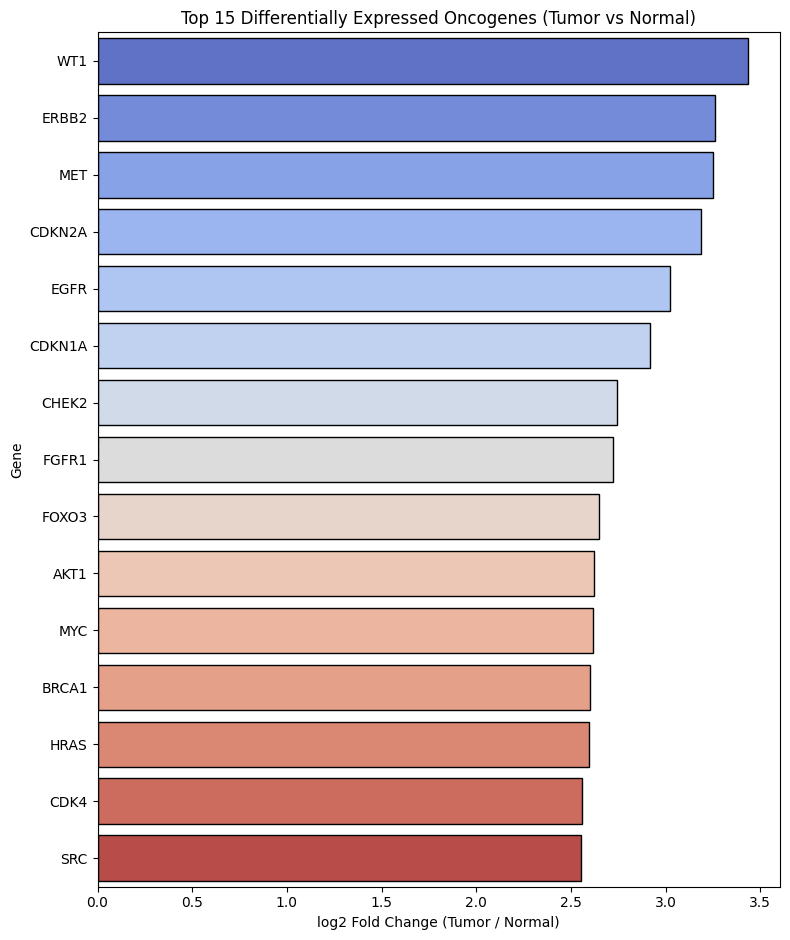

In [26]:
## Horizontal barplot of the top N differentially expressed oncogenes ranked by absolute log2 fold change

import matplotlib.pyplot as plt
import seaborn as sns

# 🔢 Set N for top genes
top_n = 15  # You can adjust this as needed

# 📊 Sort by absolute log2 fold change (descending) and take top N
top_genes_df = df_de_sig.copy()
top_genes_df["abs_log2_fc"] = top_genes_df["log2_fc"].abs()
top_genes_df = top_genes_df.sort_values("abs_log2_fc", ascending=False).head(top_n)

# 🎨 Plot barplot
plt.figure(figsize=(8, 0.5 * top_n + 2))
sns.barplot(
    data=top_genes_df,
    y="gene",
    x="log2_fc",
    palette="coolwarm",
    edgecolor="black"
)
plt.axvline(0, color="black", linestyle="--")
plt.title(f"Top {top_n} Differentially Expressed Oncogenes (Tumor vs Normal)")
plt.xlabel("log2 Fold Change (Tumor / Normal)")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()


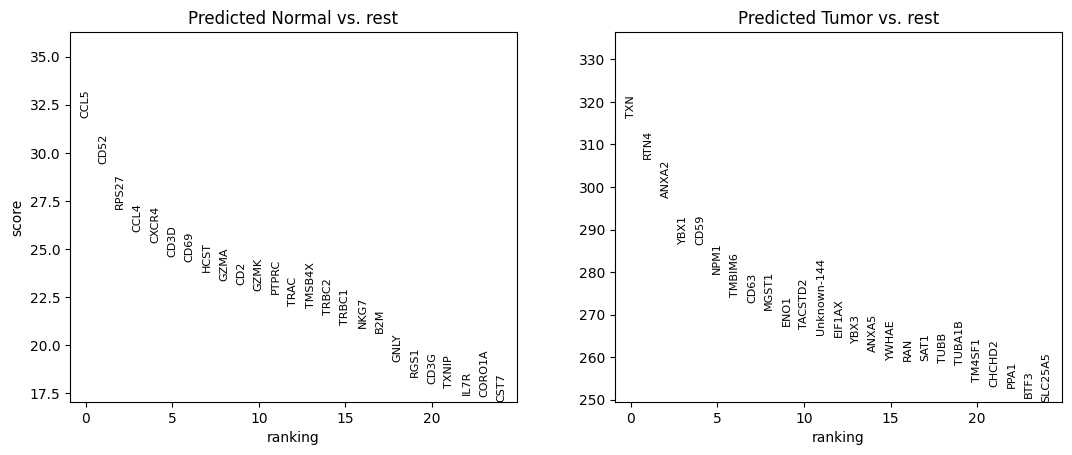

In [27]:
# run this one first
import scanpy as sc

# Step 1: Ensure categorical labels
adata_all.obs['tumor_pred_label_mito'] = adata_all.obs['tumor_pred_label_mito'].astype("category")

# Step 2: Normalize and log-transform (safe now because raw is backed up)
sc.pp.normalize_total(adata_all, target_sum=1e4)
sc.pp.log1p(adata_all)

# ✅ Skip re-assigning adata3.raw here — already done before normalization!

# Step 3: Differential expression
sc.tl.rank_genes_groups(
    adata_all,
    groupby='tumor_pred_label_mito',
    method='t-test_overestim_var',
    key_added='de_tumor_vs_normal'
)

# Step 4: Visualization
sc.pl.rank_genes_groups(
    adata_all,
    key='de_tumor_vs_normal',
    n_genes=25,
    sharey=False,
    figsize=(10, 5))

In [28]:
# ✅ Export significant DE oncogenes to CSV
output_path = "GSE161529_DE_oncogenes.csv"
df_de_sig.to_csv(output_path, index=False)
print(f"✅ File saved as: {output_path}")


✅ File saved as: GSE161529_DE_oncogenes.csv


In [30]:
import pandas as pd

# Re-load DE results
df_de_sig = pd.read_csv("GSE161529_DE_oncogenes.csv")
print(df_de_sig.head())


   gene  p_value   log2_fc  mean_diff
0  NRAS      0.0  2.477481   0.104095
1  PTEN      0.0  2.287256   0.180144
2  KRAS      0.0  2.430216   0.276512
3  CDK4      0.0  2.560410   0.401301
4  MDM2      0.0  2.100565   0.123593


In [31]:
# Step 2: Extract the list of DE oncogenes from the CSV
import pandas as pd

df_de_sig = pd.read_csv("GSE161529_DE_oncogenes.csv")
matched_genes = df_de_sig['gene'][df_de_sig['gene'].isin(adata_all.var_names)].tolist()

print(f"✅ Matched {len(matched_genes)} DE oncogenes:", matched_genes)


✅ Matched 40 DE oncogenes: ['NRAS', 'PTEN', 'KRAS', 'CDK4', 'MDM2', 'RB1', 'AKT1', 'TSC2', 'TP53', 'NF1', 'ERBB2', 'SMAD4', 'BCL2', 'SRC', 'STK11', 'BAX', 'CHEK2', 'CCND1', 'NF2', 'HRAS', 'CASP8', 'VHL', 'ATR', 'PIK3CA', 'CDKN1A', 'FOXO3', 'CDK6', 'EGFR', 'FGFR1', 'MYC', 'CDKN2A', 'NOTCH1', 'MET', 'BRCA1', 'NTRK2', 'BRCA2', 'ATM', 'FGFR2', 'WT1', 'NTRK1']


In [32]:
print(adata_all.var_names[:10])


Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'ENSG00000238009', 'ENSG00000239945',
       'ENSG00000239906', 'ENSG00000241599', 'ENSG00000236601', 'OR4F29',
       'ENSG00000235146'],
      dtype='object', name='gene_name_combined')


In [33]:
from scipy.stats import spearmanr
import pandas as pd

results = []

for gene in matched_genes:
    gene_expr = adata_all[:, gene].X.toarray().flatten()
    cnv_score = adata_all.obs["cnv_score"].values
    corr, pval = spearmanr(gene_expr, cnv_score)
    results.append({
        "gene": gene,
        "spearman_corr": round(corr, 3),
        "p_value": "{:.2e}".format(pval)
    })

# Convert to DataFrame and sort
df_corr = pd.DataFrame(results).sort_values("spearman_corr", ascending=False)

# Optional: Save
df_corr.to_csv("GSE161529_oncogene_correlation.csv", index=False)

# Display
display(df_corr)


gene  spearman_corr    p_value
3     CDK4          0.386   0.00e+00
17   CCND1          0.382   0.00e+00
2     KRAS          0.331   0.00e+00
15     BAX          0.325   0.00e+00
25   FOXO3          0.319   0.00e+00
19    HRAS          0.318   0.00e+00
29     MYC          0.313   0.00e+00
10   ERBB2          0.308   0.00e+00
1     PTEN          0.289   0.00e+00
6     AKT1          0.287   0.00e+00
9      NF1          0.269   0.00e+00
27    EGFR          0.254   0.00e+00
21     VHL          0.251   0.00e+00
0     NRAS          0.249   0.00e+00
7     TSC2          0.247   0.00e+00
11   SMAD4          0.247   0.00e+00
8     TP53          0.245   0.00e+00
18     NF2          0.243   0.00e+00
26    CDK6          0.241   0.00e+00
4     MDM2          0.241   0.00e+00
30  CDKN2A          0.235   0.00e+00
24  CDKN1A          0.235   0.00e+00
32     MET          0.229   0.00e+00
28   FGFR1          0.226   0.00e+00
5      RB1          0.220   0.00e+00
23  PIK3CA          0.210   0.00e+00
14   STK11          0.198   0.00e+00
22     ATR          0.178   0.00e+00
34   NTRK2          0.174   0.00e+00
16   CHEK2          0.171   0.00e+00
31  NOTCH1          0.166   0.00e+00
13     SRC          0.165   0.00e+00
20   CASP8          0.156   0.00e+00
33   BRCA1          0.147   0.00e+00
37   FGFR2          0.140   0.00e+00
12    BCL2          0.136   0.00e+00
35   BRCA2          0.128   0.00e+00
36     ATM          0.118   0.00e+00
38     WT1          0.036  3.72e-122
39   NTRK1          0.003   5.33e-02

In [34]:
df_corr.to_csv("DE_oncogene_vs_CNV_spearman.csv", index=False)
print("✅ File saved as 'DE_oncogene_vs_CNV_spearman.csv'")


✅ File saved as 'DE_oncogene_vs_CNV_spearman.csv'


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/2855569080.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_corr, x="spearman_corr", y="gene", palette="viridis")


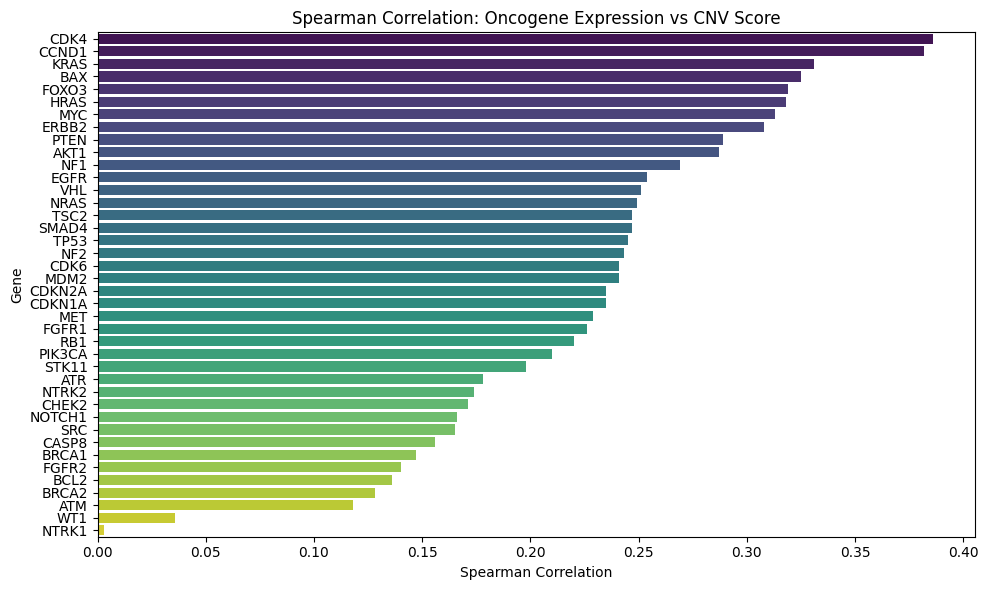

In [35]:
## Spearman Correlation: Oncogene Expression vs CNV Score

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_corr, x="spearman_corr", y="gene", palette="viridis")
plt.title("Spearman Correlation: Oncogene Expression vs CNV Score")
plt.xlabel("Spearman Correlation")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

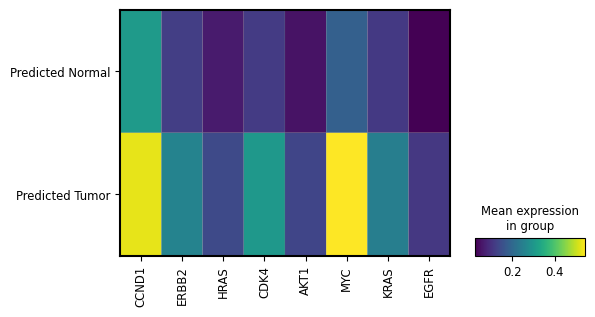

In [36]:
##"Correlation vs. Expression: For top genes, show how expression differs by predicted tumor/normal label."
## Interpretation: "Are genes with high CNV correlation also differentially expressed across predicted tumor vs. normal?"
import scanpy as sc
import matplotlib.pyplot as plt

# Genes of interest with therapeutic potential
#pathway_genes = ["CCND1", "ERBB2", "HRAS", "CDK4", "AKT1","MYC","KRAS","EGFR"]
pathway_genes = ["CCND1", "ERBB2", "HRAS", "CDK4", "AKT1", "MYC", "KRAS", "EGFR"]

sc.pl.matrixplot(
    adata_all,
    var_names=pathway_genes,
    groupby="tumor_pred_label_mito",
    cmap="viridis",
    use_raw=False,
    figsize=(6, len(pathway_genes) * 0.4)
)




/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/812167199.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = X.groupby("label").mean()


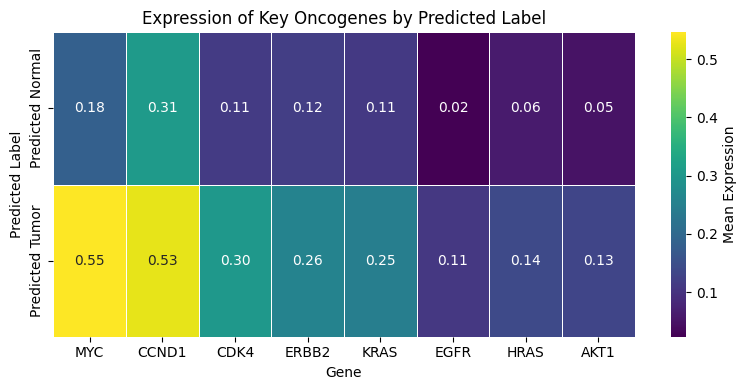

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Genes of interest
genes = ["CCND1", "ERBB2", "HRAS", "CDK4", "AKT1","MYC","KRAS","EGFR"]

# Step 2: Extract expression values
X = adata_all[:, genes].to_df()
X["label"] = adata_all.obs["tumor_pred_label_mito"].values

# Step 3: Compute mean expression per group
means = X.groupby("label").mean()

# Step 4: Sort genes by tumor - normal difference
diff = means.loc["Predicted Tumor"] - means.loc["Predicted Normal"]
sorted_genes = diff.sort_values(ascending=False).index.tolist()

# Step 5: Plot annotated heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    means[sorted_genes], 
    cmap="viridis", 
    annot=True, 
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Mean Expression"}
)
plt.title("Expression of Key Oncogenes by Predicted Label")
plt.xlabel("Gene")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/2804623306.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = X.groupby("label").mean()


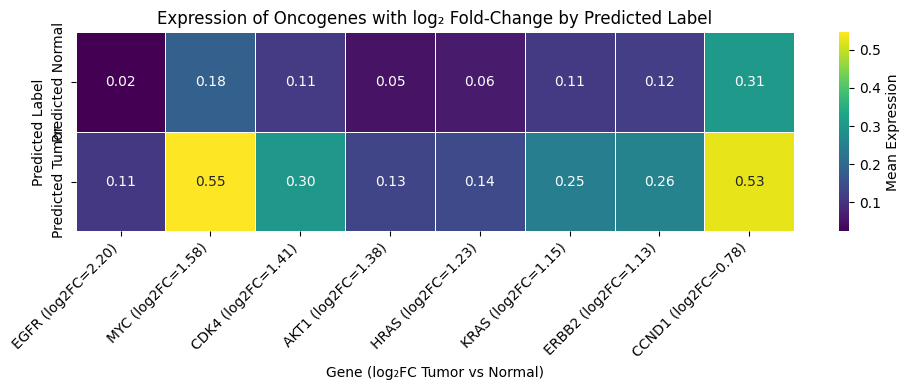

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Genes of interest
#genes = ["CCND1", "ERBB2", "HRAS", "CDK4", "MDM2", "MYC", "KRAS"]
genes = ["CCND1", "ERBB2", "HRAS", "CDK4", "AKT1","MYC","KRAS","EGFR"]

# Step 1: Extract expression
X = adata_all[:, genes].to_df()
X["label"] = adata_all.obs["tumor_pred_label_mito"].values

# Step 2: Compute mean expression
means = X.groupby("label").mean()

# Step 3: Compute log2 fold-change
eps = 1e-6  # to avoid log(0)
log2fc = np.log2((means.loc["Predicted Tumor"] + eps) / (means.loc["Predicted Normal"] + eps))



# Step 4: Sort genes by log2 fold-change
sorted_genes = log2fc.sort_values(ascending=False).index.tolist()

# Step 5: Rename genes to include log2FC in label
gene_labels = [f"{gene} (log2FC={log2fc[gene]:.2f})" for gene in sorted_genes]

# Step 6: Re-plot with annotation and renamed genes
plt.figure(figsize=(10, 4))
sns.heatmap(
    means[sorted_genes], 
    cmap="viridis", 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5,
    cbar_kws={"label": "Mean Expression"}
)
plt.xticks(ticks=np.arange(len(gene_labels)) + 0.5, labels=gene_labels, rotation=45, ha='right')
plt.title("Expression of Oncogenes with log₂ Fold-Change by Predicted Label")
plt.xlabel("Gene (log₂FC Tumor vs Normal)")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()


/Users/adi/Desktop/Cancer_project/ghost-cell-busters/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


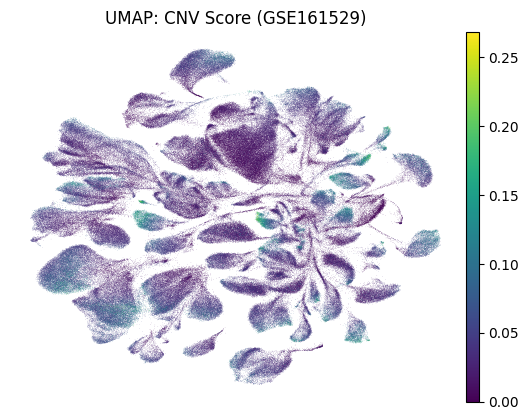

In [39]:
import scanpy as sc

# 1. Compute neighbors (after PCA)
sc.pp.pca(adata_all)
sc.pp.neighbors(adata_all, n_neighbors=15, n_pcs=30)

# 2. Compute UMAP embedding
sc.tl.umap(adata_all)

# 3. Plot CNV Score on UMAP
sc.pl.umap(
    adata_all,
    color='cnv_score',
    cmap='viridis',
    title='UMAP: CNV Score (GSE161529)',
    frameon=False
)

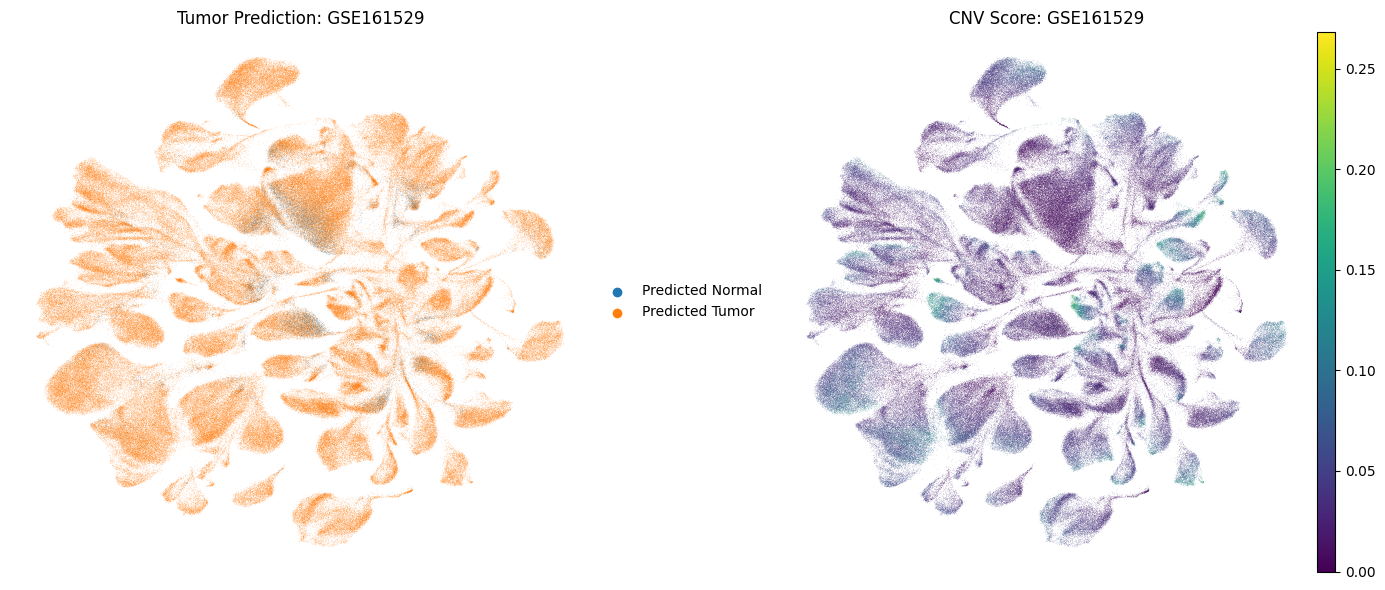

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# UMAP: Tumor predictions
sc.pl.umap(
    adata_all,  # your GSE161529 AnnData object
    color="tumor_pred_label_mito",
    title="Tumor Prediction: GSE161529",
    ax=axs[0],
    show=False,
    frameon=False
)

# UMAP: CNV score
sc.pl.umap(
    adata_all,
    color="cnv_score",
    cmap="viridis",
    title="CNV Score: GSE161529",
    ax=axs[1],
    show=False,
    frameon=False
)

plt.tight_layout()
plt.show()


/Users/adi/Desktop/Cancer_project/ghost-cell-busters/venv/lib/python3.11/site-packages/legacy_api_wrap/__init__.py:82: FutureWarning: `scale` is deprecated, use `density_norm` instead
  return fn(*args_all, **kw)


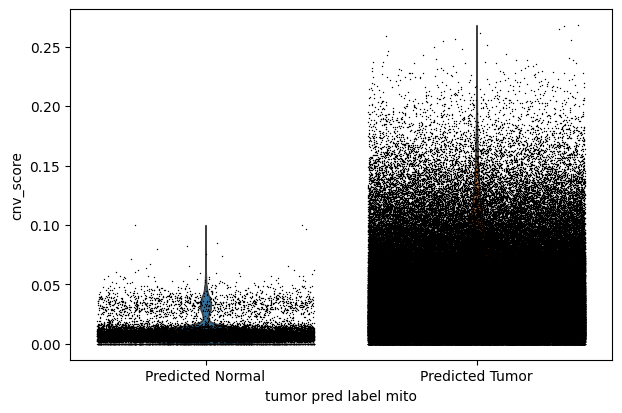

In [41]:
## This violin plot provides strong evidence that Predicted Tumor cells in GSE180286 tend to have higher CNV scores than Predicted Normal cells.

sc.pl.violin(
    adata_all,
    keys="cnv_score",
    groupby="tumor_pred_label_mito",
    jitter=0.4,
    stripplot=True,
    scale="width",
    show=True
)

In [42]:
##The result supports the biological validity of our tumor prediction model.

##High CNV scores in tumor-labeled cells are consistent with genomic instability — a hallmark of many cancers.

##This makes CNV score an orthogonal validation of our ML classifier’s predictions.



from scipy.stats import mannwhitneyu

group1 = adata_all.obs.loc[adata_all.obs["tumor_pred_label_mito"] == "Predicted Normal", "cnv_score"]
group2 = adata_all.obs.loc[adata_all.obs["tumor_pred_label_mito"] == "Predicted Tumor", "cnv_score"]

u_stat, p_val = mannwhitneyu(group1, group2, alternative="two-sided")
print(f"U-statistic: {u_stat:.2e}")
print(f"P-value: {p_val:.2e}")

U-statistic: 1.01e+09
P-value: 0.00e+00


The title list is shorter than the number of panels. Using 'color' value instead for some plots.
The title list is shorter than the number of panels. Using 'color' value instead for some plots.
The title list is shorter than the number of panels. Using 'color' value instead for some plots.


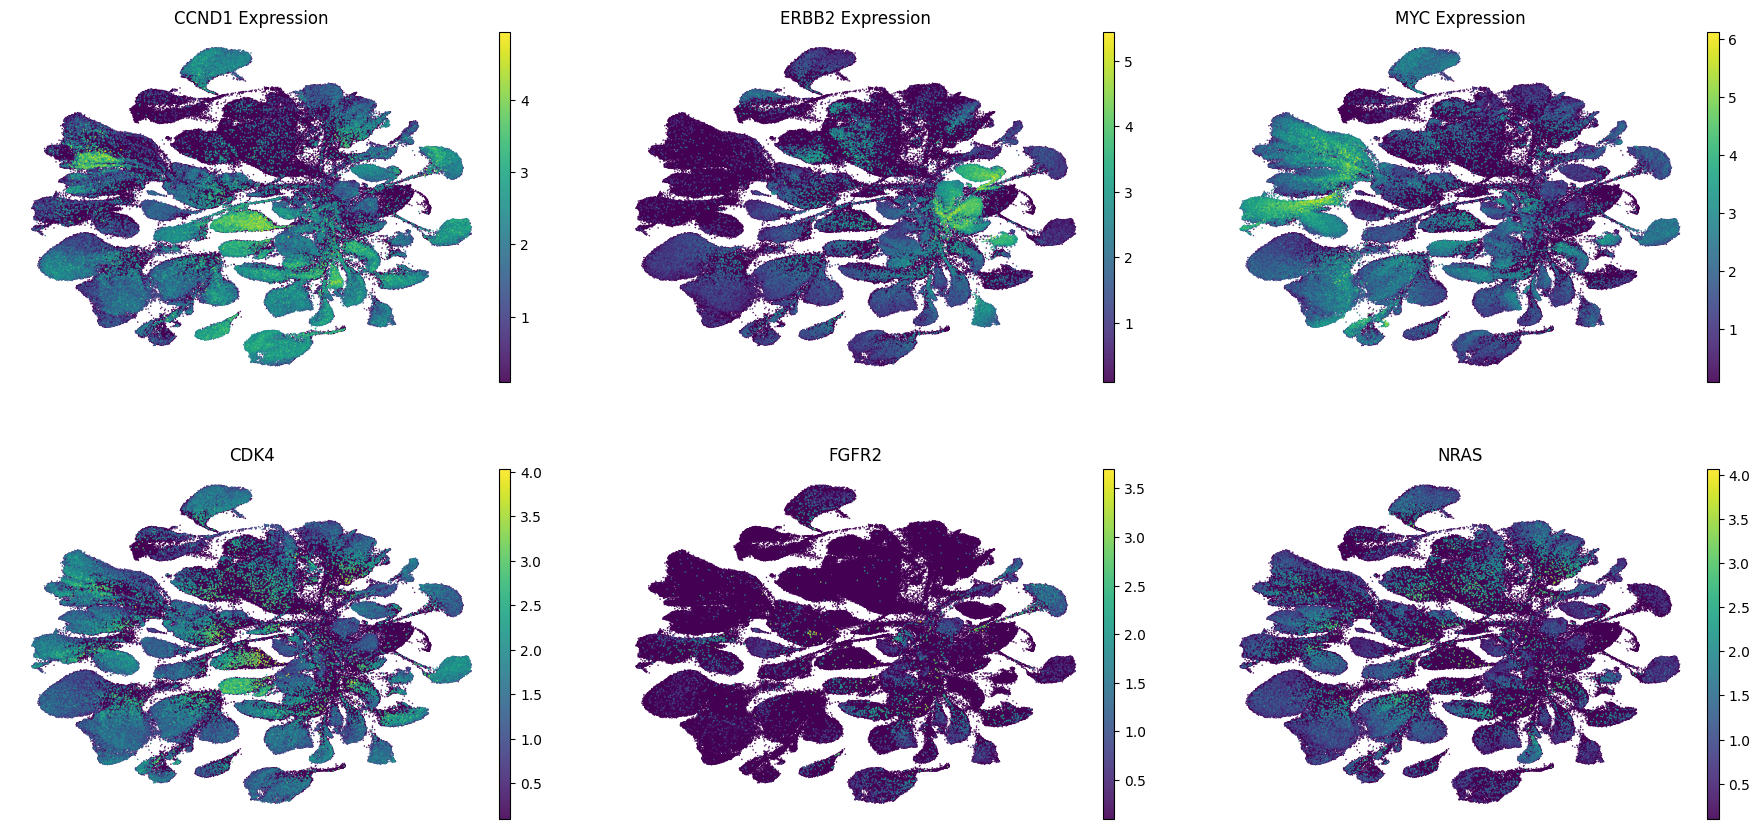

In [43]:
sc.pl.umap(
    adata_all,  # use adata_all or adata_GSE161529
    color=["CCND1", "ERBB2", "MYC","CDK4","FGFR2","NRAS"],  # or any gene(s)
    cmap="viridis",                  # ✅ preferred colormap
    vmin=0.1, vmax=None,
    alpha=0.9,
    size=5,
    ncols=3,
    frameon=False,
    title=["CCND1 Expression", "ERBB2 Expression", "MYC Expression"]
)


In [44]:
## Statistical testing to compare gene expression between predicted tumor and normal cells across our oncogenes of interest 
##in the GSE161529 dataset.

from scipy.stats import mannwhitneyu

# Define your 10 oncogenes
#oncogenes = ["CCND1", "ERBB2", "MYC", "CDK4", "KRAS", "FGFR1", "HRAS", "AKT1", "EGFR", "MDM2"]
oncogenes = [
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK2"
]
tumor_suppressors = [
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]
genes_of_interest = oncogenes + tumor_suppressors
# Prepare results list
results = []

# Loop through each gene and compare predicted tumor vs normal
for gene in genes_of_interest:
    if gene not in adata_all.var_names:
        print(f"⚠️ Gene {gene} not found in adata3.var_names")
        continue
    
    expr = adata_all[:, gene].X.toarray().flatten() if hasattr(adata_all[:, gene].X, "toarray") else adata_all[:, gene].X
    labels = adata_all.obs["tumor_pred_label_mito"]

    tumor_expr = expr[labels == "Predicted Tumor"]
    normal_expr = expr[labels == "Predicted Normal"]

    stat, p = mannwhitneyu(tumor_expr, normal_expr, alternative="two-sided")
    
    results.append({
        "Gene": gene,
        "Tumor_Mean": np.mean(tumor_expr),
        "Normal_Mean": np.mean(normal_expr),
        "U_statistic": stat,
        "p_value": p
    })

# Convert to DataFrame and adjust p-values (optional)
df_stats = pd.DataFrame(results)
df_stats["adj_pval_bh"] = pd.Series(
    pd.Series(df_stats["p_value"]).rank(method="min") / len(df_stats) * 0.05
)
df_stats = pd.DataFrame(results)
df_stats["adj_pval_bh"] = pd.Series(
    pd.Series(df_stats["p_value"]).rank(method="min") / len(df_stats) * 0.05
)
df_stats

Gene  Tumor_Mean  Normal_Mean   U_statistic        p_value  adj_pval_bh
0      MYC    0.546129     0.182254  4.418338e+09   0.000000e+00     0.001282
1     EGFR    0.107526     0.023381  3.886360e+09  3.844290e-299     0.017949
2    ERBB2    0.257026     0.117563  3.990929e+09   0.000000e+00     0.001282
3    CCND1    0.526856     0.306447  4.229014e+09   0.000000e+00     0.001282
4     BCL2    0.090127     0.059161  3.749318e+09  2.316177e-122     0.037179
5   PIK3CA    0.079144     0.034618  3.802006e+09  7.301170e-196     0.033333
6     AKT1    0.129689     0.049910  3.938624e+09   0.000000e+00     0.001282
7     KRAS    0.245411     0.110647  4.145721e+09   0.000000e+00     0.001282
8     NRAS    0.101648     0.039709  3.868721e+09  2.514962e-265     0.019231
9     HRAS    0.140665     0.060158  3.960937e+09   0.000000e+00     0.001282
10    MDM2    0.128775     0.061899  3.889111e+09  3.329019e-264     0.020513
11   FGFR1    0.289362     0.092621  4.137365e+09   0.000000e+00     0.001282
12   FGFR2    0.023365     0.010151  3.643738e+09   2.970825e-49     0.048718
13     MET    0.086276     0.017499  3.826814e+09  8.714637e-242     0.024359
14    CDK4    0.302680     0.113688  4.259306e+09   0.000000e+00     0.001282
15    CDK6    0.103414     0.043153  3.844883e+09  4.234873e-230     0.029487
16     SRC    0.036125     0.011804  3.695004e+09  3.181445e-105     0.041026
17  NOTCH1    0.051850     0.030215  3.712332e+09  1.926306e-106     0.039744
18   NTRK2    0.081046     0.037250  3.747000e+09  7.527637e-130     0.035897
19    TP53    0.102443     0.045575  3.848563e+09  1.410044e-231     0.028205
20     RB1    0.117402     0.060857  3.859537e+09  3.822863e-235     0.026923
21   BRCA1    0.023073     0.009561  3.652740e+09   9.649900e-66     0.044872
22   BRCA2    0.022467     0.009367  3.646538e+09   4.583368e-59     0.047436
23  CDKN2A    0.161340     0.053236  3.852114e+09  6.613035e-240     0.025641
24  CDKN1A    0.379326     0.129759  4.240963e+09   0.000000e+00     0.001282
25    PTEN    0.175004     0.076250  4.007095e+09   0.000000e+00     0.001282
26   SMAD4    0.099926     0.043967  3.858416e+09  5.201723e-245     0.023077
27     ATM    0.137968     0.157252  3.726538e+09   1.465585e-65     0.046154
28     ATR    0.039454     0.018531  3.701788e+09  6.622097e-105     0.042308
29   CHEK2    0.028533     0.009226  3.676567e+09   8.647265e-90     0.043590
30     NF1    0.142973     0.058158  3.959041e+09   0.000000e+00     0.001282
31     NF2    0.070564     0.026625  3.801220e+09  9.562126e-200     0.032051
32   STK11    0.065892     0.030864  3.766971e+09  1.551483e-163     0.034615
33     VHL    0.090463     0.041944  3.839680e+09  3.107209e-228     0.030769
34     WT1    0.001626     0.000503  3.585016e+09   3.457278e-07     0.050000
35   FOXO3    0.266578     0.090009  4.202025e+09   0.000000e+00     0.001282
36     BAX    0.323615     0.183903  4.186255e+09   0.000000e+00     0.001282
37   CASP8    0.069162     0.044675  3.736473e+09  2.327070e-120     0.038462
38    TSC2    0.120975     0.061879  3.879494e+09  2.002012e-255     0.021795

In [44]:
# Key genes in PI3K–MAPK–EGFR axis
axis_genes = [
    "EGFR",      # receptor tyrosine kinase
    "PIK3CA",    # PI3K catalytic subunit
    "AKT1",      # PI3K effector
    "MTOR",      # downstream target of AKT
    "KRAS", "NRAS", "HRAS",  # MAPK upstream regulators
    "BRAF", "RAF1",          # MAPK kinase cascade
    "MAP2K1", "MAP2K2",      # MEK1/2
    "MAPK1", "MAPK3"         # ERK2/1
]
# Get matched genes (your var_names may be like 'EGFR_ENSG...')
matched_genes = [g for g in adata_all.var_names if g.split("_")[0] in axis_genes]
print(f"✅ Matched genes: {matched_genes}")


✅ Matched genes: ['MTOR', 'NRAS', 'RAF1', 'PIK3CA', 'EGFR', 'BRAF', 'HRAS', 'KRAS', 'AKT1', 'MAP2K1', 'MAPK3', 'MAP2K2', 'MAPK1']


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/4068228916.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = expr_df.groupby("label").mean().T


label               Predicted Normal  Predicted Tumor
gene_name_combined                                   
NRAS                        0.039709         0.101648
PTEN                        0.076250         0.175004
KRAS                        0.110647         0.245411
CDK4                        0.113688         0.302680
MDM2                        0.061899         0.128775
RB1                         0.060857         0.117402
AKT1                        0.049910         0.129689
TSC2                        0.061879         0.120975
TP53                        0.045575         0.102443
NF1                         0.058158         0.142973
ERBB2                       0.117563         0.257026
SMAD4                       0.043967         0.099926
BCL2                        0.059161         0.090127
SRC                         0.011804         0.036125
STK11                       0.030864         0.065892
BAX                         0.183903         0.323615
CHEK2                       

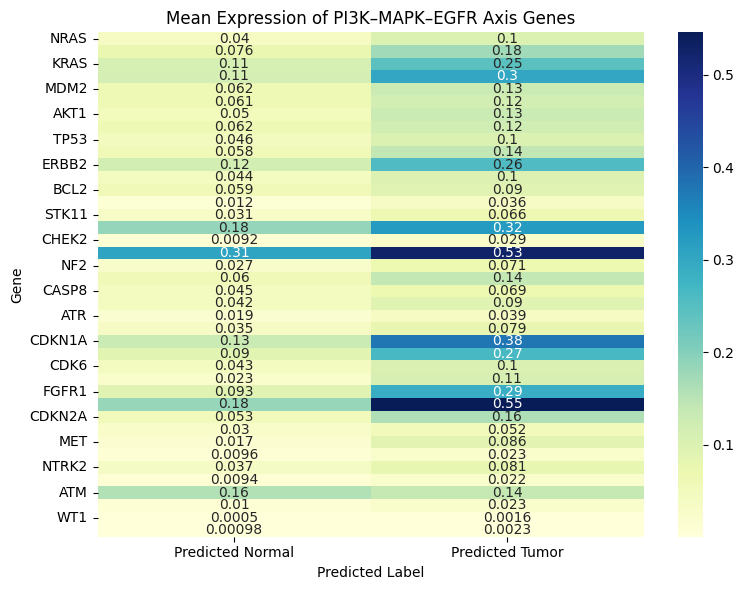

In [45]:
# Create dataframe of expression for those genes
expr_df = adata_all[:, matched_genes].to_df()
expr_df["label"] = adata_all.obs["tumor_pred_label_mito"].values

# Group mean
group_means = expr_df.groupby("label").mean().T
print(group_means)

# Optional heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(group_means, cmap="YlGnBu", annot=True)
plt.title("Mean Expression of PI3K–MAPK–EGFR Axis Genes")
plt.ylabel("Gene")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [58]:
oncogenes = [
    "MYC", "EGFR", "ERBB2", "CCND1", "BCL2", "PIK3CA", "AKT1", "KRAS", "NRAS", "HRAS",
    "MDM2", "FGFR1", "FGFR2", "MET", "CDK4", "CDK6", "SRC", "NOTCH1", "NTRK2"
]
tumor_suppressors = [
    "TP53", "RB1", "BRCA1", "BRCA2", "CDKN2A", "CDKN1A", "PTEN", "SMAD4", "ATM", "ATR",
    "CHEK2", "NF1", "NF2", "STK11", "VHL", "WT1", "FOXO3", "BAX", "CASP8", "TSC2"
]
genes_of_interest = oncogenes + tumor_suppressors

from scipy.stats import ttest_ind

labels = adata_all.obs["tumor_pred_label_mito"]
results = []

for gene in genes_of_interest:
    if gene in adata_all.var_names:
        tumor_vals = adata_all[labels == "Predicted Tumor", gene].X.toarray().flatten()
        normal_vals = adata_all[labels == "Predicted Normal", gene].X.toarray().flatten()
        
        if len(tumor_vals) > 1 and len(normal_vals) > 1:
            t_stat, p_val = ttest_ind(tumor_vals, normal_vals, equal_var=False)
            log2fc = np.log2((tumor_vals.mean() + 1e-6) / (normal_vals.mean() + 1e-6))
            results.append((gene, p_val, log2fc))

# 📊 Create DataFrame
gene_stat_df = pd.DataFrame(results, columns=["Gene", "pval", "log2FC"])


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

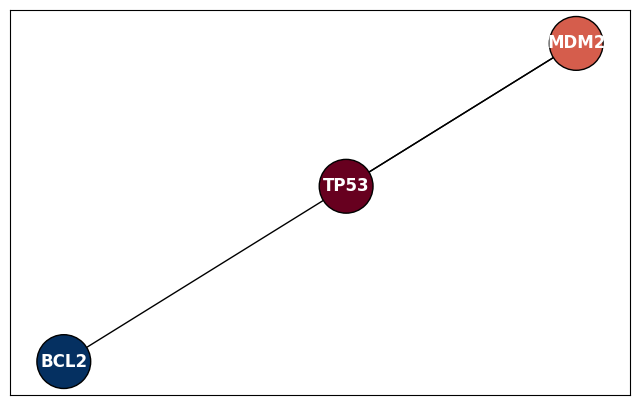

In [59]:
## MYC Signaling Axis with Tumor log2FC Overlay

def get_log2fc_dict(genes, gene_stat_df):
    # Ensure consistent case for matching
    genes = [g.upper() for g in genes]
    gene_stat_df["Gene"] = gene_stat_df["Gene"].str.upper()

    subset = gene_stat_df[gene_stat_df["Gene"].isin(genes)]
    if subset.empty:
        raise ValueError("None of the genes in the network were found in gene_stat_df.")
    return dict(zip(subset["Gene"], subset["log2FC"]))

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

def plot_log2fc_network(edges, log2fc_dict, title="Pathway Network"):
    G = nx.DiGraph()
    G.add_edges_from(edges)

    nodes = list(G.nodes())
    values = [log2fc_dict.get(node, 0) for node in nodes]

    vmin, vmax = min(values), max(values)
    cmap = cm.RdBu_r

    # Use TwoSlopeNorm only if values span both + and -
    if vmin < 0 < vmax:
        norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
    else:
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    node_colors = [cmap(norm(val)) for val in values]

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 5))
    nx.draw_networkx_edges(G, pos, arrows=True, edge_color="black")
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, edgecolors="black")
    nx.draw_networkx_labels(G, pos, font_color="white", font_weight="bold")

    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label("log2FC (Tumor vs Normal)")

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

tp53_edges = [
    ("TP53", "MDM2"),
    ("MDM2", "TP53"),
    ("TP53", "BCL2")
]
tp53_genes = list(set([g for edge in tp53_edges for g in edge]))
tp53_log2fc = get_log2fc_dict(tp53_genes, gene_stat_df)
plot_log2fc_network(tp53_edges, tp53_log2fc, title="TP53–MDM2–BCL2 Axis (GSE161529)")









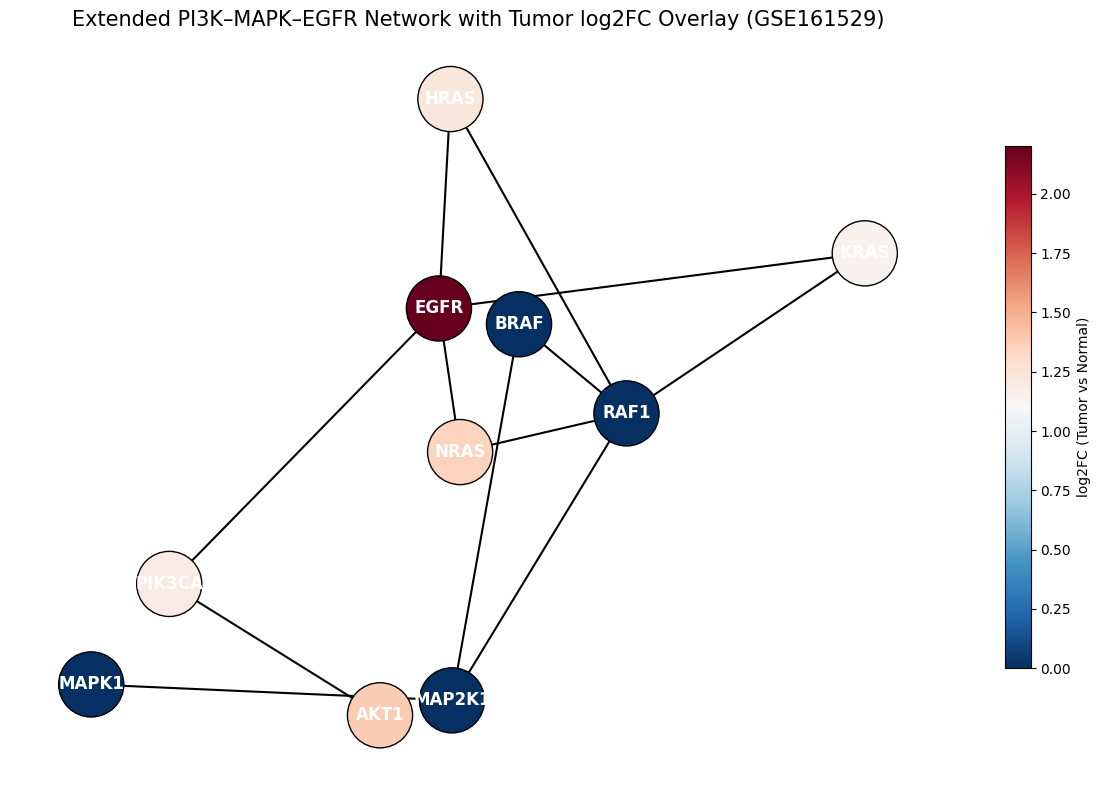

In [62]:
# Step 1: Define the expanded PI3K–MAPK–EGFR pathway edges
edges = [
    ("EGFR", "KRAS"),
    ("EGFR", "NRAS"),
    ("EGFR", "HRAS"),
    ("KRAS", "RAF1"),
    ("NRAS", "RAF1"),
    ("HRAS", "RAF1"),
    ("RAF1", "BRAF"),
    ("BRAF", "MAP2K1"),
    ("RAF1", "MAP2K1"),
    ("MAP2K1", "MAPK1"),
    ("EGFR", "PIK3CA"),
    ("PIK3CA", "AKT1")
]

# Step 2: Extract updated log2FC values
log2fc_dict = dict(zip(gene_stat_df["Gene"], gene_stat_df["log2FC"]))

# Step 3: Build the directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Step 4: Color nodes by updated log2FC
nodes = list(G.nodes())
log2fc_values = [log2fc_dict.get(node, 0) for node in nodes]

vmin, vmax = min(log2fc_values), max(log2fc_values)
if vmin < 0 < vmax:
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
else:
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

cmap = cm.RdBu_r
node_colors = [cmap(norm(val)) for val in log2fc_values]

plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

pos = nx.spring_layout(G, seed=42, k=0.7)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black', width=1.5, ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color=node_colors, edgecolors="black", ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', font_weight='bold', ax=ax)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(log2fc_values)  # Important: assign the actual values here

plt.colorbar(sm, ax=ax, shrink=0.7, label="log2FC (Tumor vs Normal)")

plt.title("Extended PI3K–MAPK–EGFR Network with Tumor log2FC Overlay (GSE161529)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/3012619489.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdBu_r")


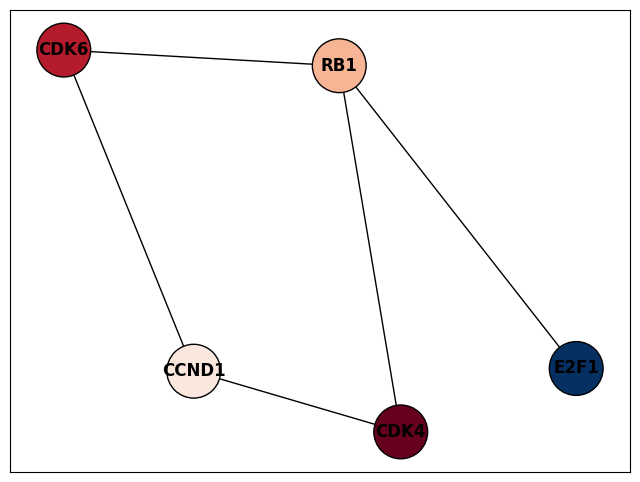

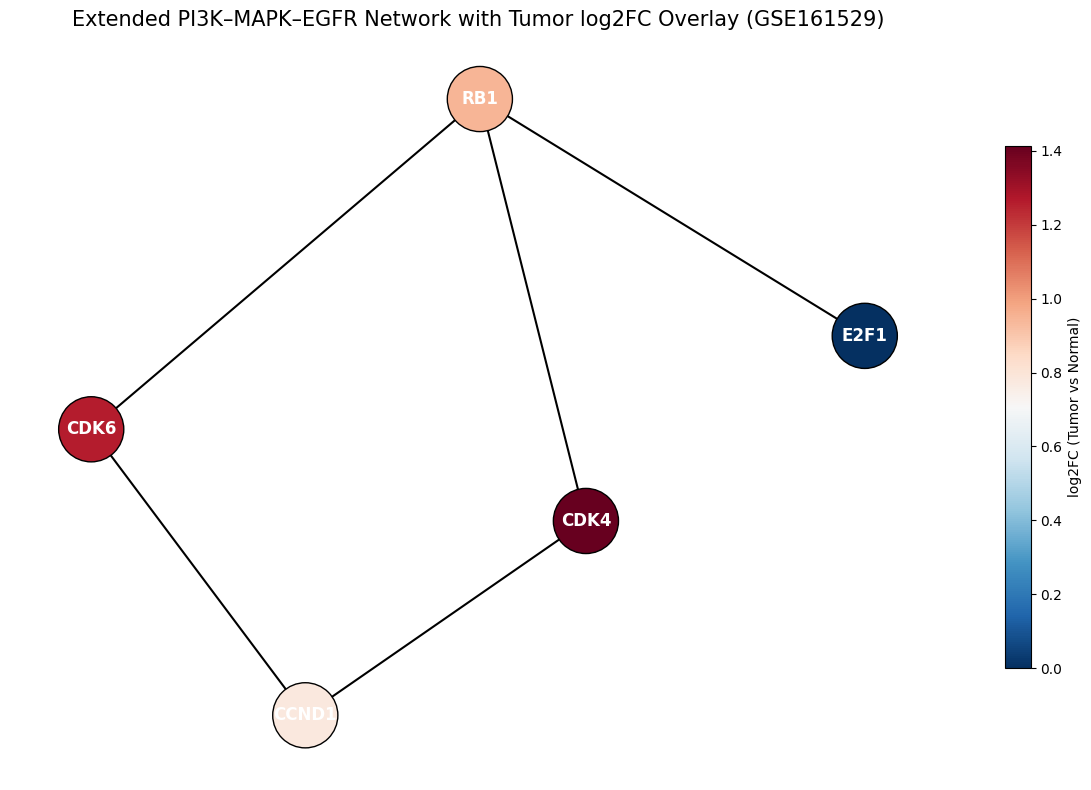

In [63]:
##CDK4–CDK6–CCND1 Axis with Tumor log₂FC Overlay 

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

# ✅ Step 1: Define G1/S checkpoint genes
genes_of_interest = ["CCND1", "CDK4", "CDK6", "RB1", "E2F1"]

# ✅ Step 2: Subset your updated gene_stat_df
subset_df = gene_stat_df[gene_stat_df["Gene"].isin(genes_of_interest)]

# ✅ Step 3: Create log2FC dictionary
if subset_df.empty:
    raise ValueError("None of the genes in the G1/S axis were found in gene_stat_df.")
log2fc_dict = dict(zip(subset_df["Gene"], subset_df["log2FC"]))

# ✅ Step 4: Define directed edges for the axis
edges = [
    ("CCND1", "CDK4"),
    ("CCND1", "CDK6"),
    ("CDK4", "RB1"),
    ("CDK6", "RB1"),
    ("RB1", "E2F1")
]

# ✅ Step 5: Create the directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# ✅ Step 6: Normalize node colors by log2FC
values = [log2fc_dict.get(node, 0) for node in G.nodes]
vmin, vmax = min(values), max(values)

# Use balanced normalization
if vmin < 0 < vmax:
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
else:
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

cmap = cm.get_cmap("RdBu_r")
node_colors = [cmap(norm(log2fc_dict.get(node, 0))) for node in G.nodes]

# ✅ Step 7: Draw the network
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))

nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, edgecolors="black")

plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

pos = nx.spring_layout(G, seed=42, k=0.7)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black', width=1.5, ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color=node_colors, edgecolors="black", ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', font_weight='bold', ax=ax)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(log2fc_values)  # Important: assign the actual values here

plt.colorbar(sm, ax=ax, shrink=0.7, label="log2FC (Tumor vs Normal)")

plt.title("Extended PI3K–MAPK–EGFR Network with Tumor log2FC Overlay (GSE161529)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_17511/2600709635.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("RdBu_r")


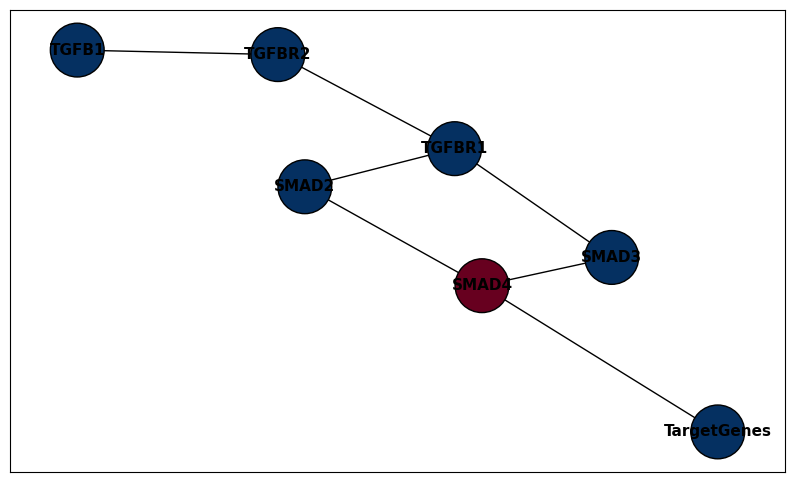

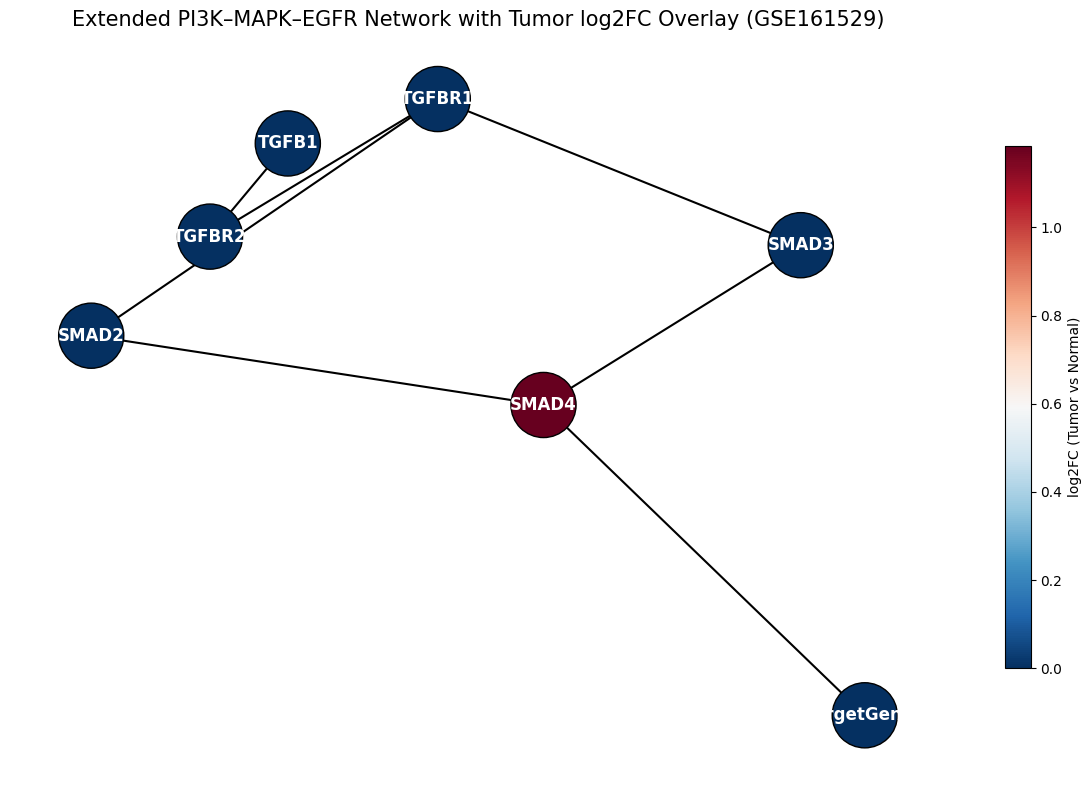

In [65]:
##TGF-β / SMAD Pathway Plotting Code

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# STEP 1: Define pathway structure (simplified canonical TGF-β signaling)
edges = [
    ("TGFB1", "TGFBR2"),
    ("TGFBR2", "TGFBR1"),
    ("TGFBR1", "SMAD2"),
    ("TGFBR1", "SMAD3"),
    ("SMAD2", "SMAD4"),
    ("SMAD3", "SMAD4"),
    ("SMAD4", "TargetGenes")  # placeholder for downstream effects
]

# STEP 2: Extract genes from edges
tgfb_genes = list(set(g for edge in edges for g in edge if g != "TargetGenes"))

# STEP 3: Create log2FC dictionary from your DE dataframe
# Assumes gene_stat_df has "Gene" and "log2FC" columns
subset_df = gene_stat_df[gene_stat_df["Gene"].isin(tgfb_genes)]
log2fc_dict = dict(zip(subset_df["Gene"], subset_df["log2FC"]))

# STEP 4: Create the graph
G = nx.DiGraph()
G.add_edges_from(edges)

# STEP 5: Map log2FC to node colors
values = [log2fc_dict.get(node, 0) for node in G.nodes]
#vmin, vmax = min(values), max(values)
vmin, vmax = min(values), max(values)

if vmin < 0 < vmax:
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
else:
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)


#norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = cm.get_cmap("RdBu_r")
node_colors = [cmap(norm(log2fc_dict.get(node, 0))) for node in G.nodes]

# STEP 6: Draw network
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_edges(G, pos, arrows=True, edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, edgecolors="black")

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

pos = nx.spring_layout(G, seed=42, k=0.7)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black', width=1.5, ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color=node_colors, edgecolors="black", ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', font_weight='bold', ax=ax)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(log2fc_values)  # Important: assign the actual values here

plt.colorbar(sm, ax=ax, shrink=0.7, label="log2FC (Tumor vs Normal)")

plt.title("Extended PI3K–MAPK–EGFR Network with Tumor log2FC Overlay (GSE161529)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


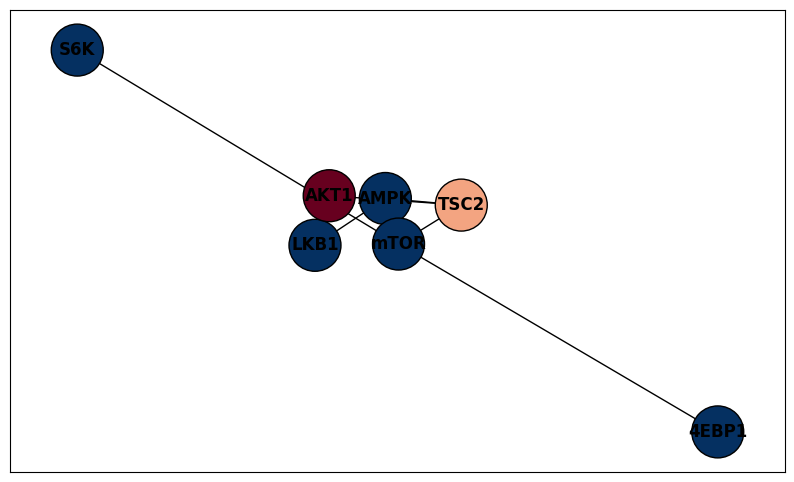

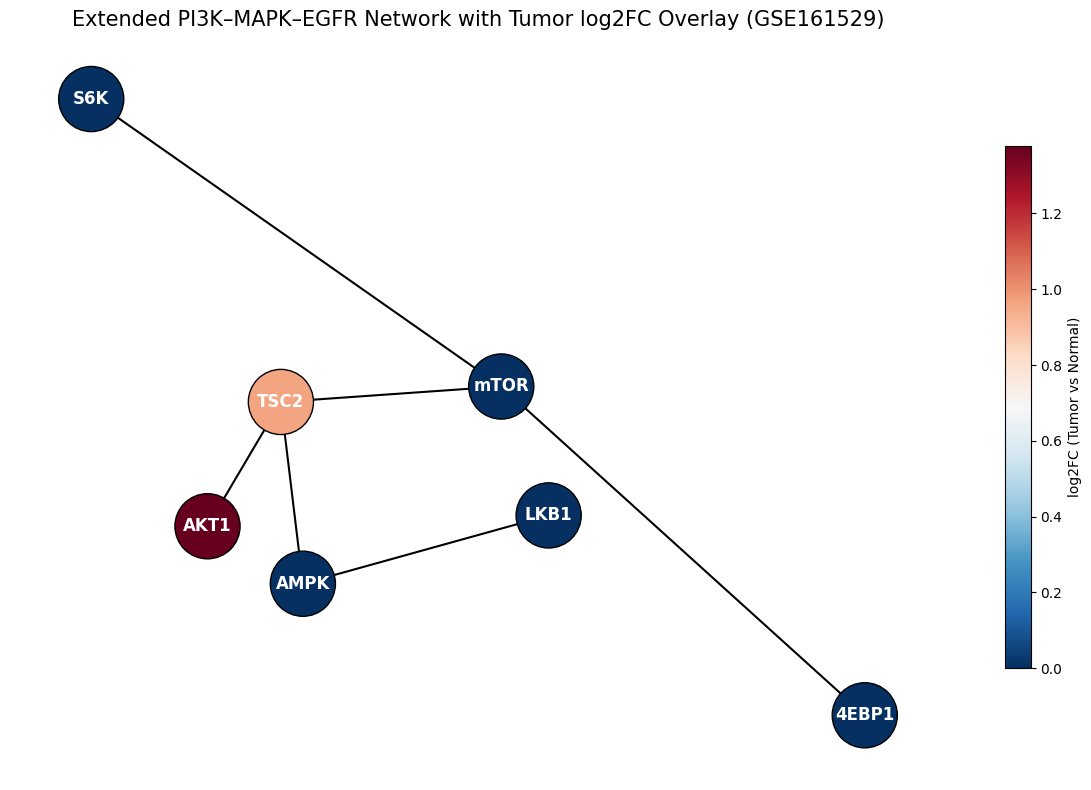

In [66]:
## Code for mTOR–AMPK Pathway Network

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# ✅ Step 1: Define the mTOR–AMPK pathway structure
edges = [
    ("LKB1", "AMPK"),
    ("AMPK", "TSC2"),
    ("TSC2", "mTOR"),
    ("AKT1", "TSC2"),
    ("mTOR", "S6K"),
    ("mTOR", "4EBP1")
]

# ✅ Step 2: Genes in the network
genes = list(set([gene for edge in edges for gene in edge]))

# ✅ Step 3: Extract log2FC values from your differential expression DataFrame
# Ensure 'Gene' and 'log2FC' columns are in gene_stat_df
subset = gene_stat_df[gene_stat_df["Gene"].isin(genes)]
if subset.empty:
    raise ValueError("None of the genes in the mTOR–AMPK network were found in gene_stat_df.")

log2fc_dict = dict(zip(subset["Gene"], subset["log2FC"]))

# ✅ Step 4: Create the graph and color by log2FC
G = nx.DiGraph()
G.add_edges_from(edges)

values = [log2fc_dict.get(node, 0) for node in G.nodes]
vmin, vmax = min(values), max(values)

# Choose appropriate colormap
if vmin < 0 < vmax:
    norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
else:
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

cmap = cm.RdBu_r
node_colors = [cmap(norm(log2fc_dict.get(node, 0))) for node in G.nodes]

# ✅ Step 5: Plot the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 6))

nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1400, edgecolors='black')

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

pos = nx.spring_layout(G, seed=42, k=0.7)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black', width=1.5, ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color=node_colors, edgecolors="black", ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', font_weight='bold', ax=ax)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(log2fc_values)  # Important: assign the actual values here

plt.colorbar(sm, ax=ax, shrink=0.7, label="log2FC (Tumor vs Normal)")

plt.title("Extended PI3K–MAPK–EGFR Network with Tumor log2FC Overlay (GSE161529)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


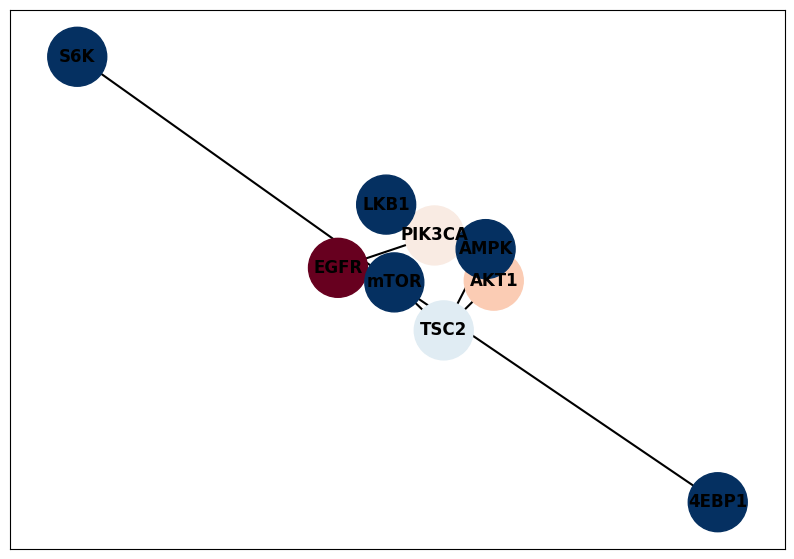

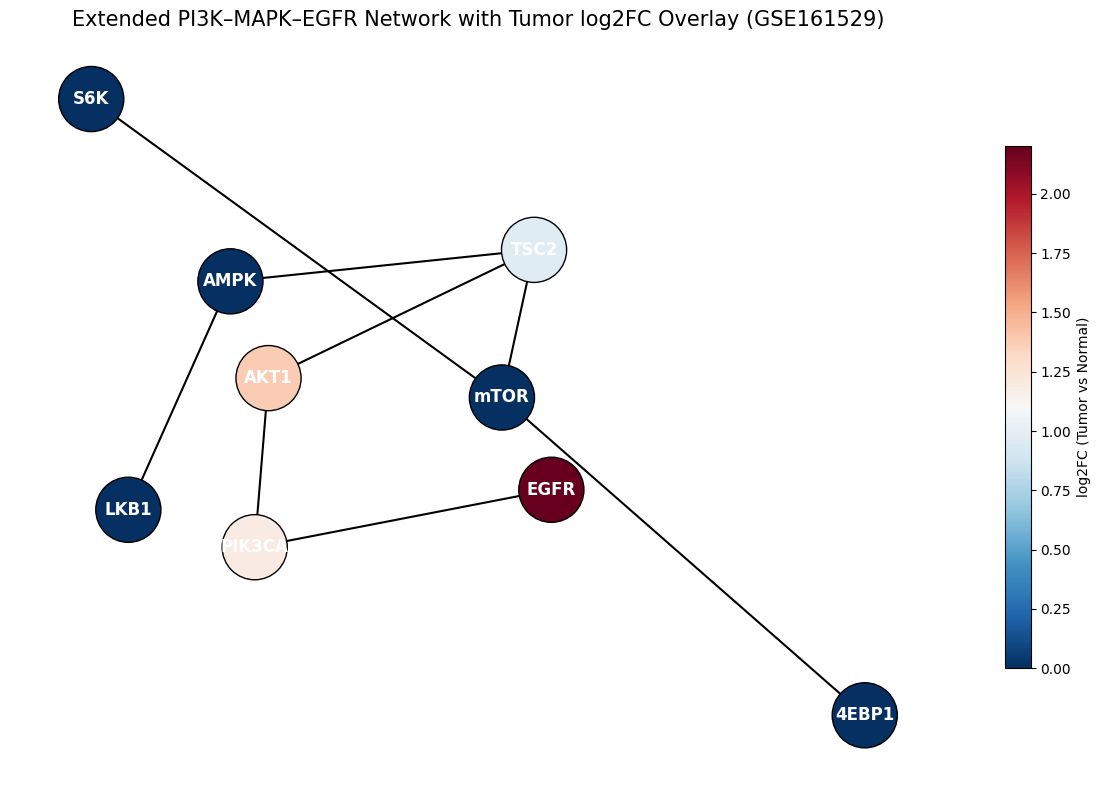

In [67]:
## PI3K–AKT–mTOR–AMPK Signaling Pathway Network
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Step 1: Define nodes (pathway genes)
genes = ["EGFR", "PIK3CA", "AKT1", "TSC2", "mTOR", "S6K", "4EBP1", "LKB1", "AMPK"]

# Step 2: Define edges (signal flow)
edges = [
    ("EGFR", "PIK3CA"),
    ("PIK3CA", "AKT1"),
    ("AKT1", "TSC2"),
    ("TSC2", "mTOR"),
    ("mTOR", "S6K"),
    ("mTOR", "4EBP1"),
    ("LKB1", "AMPK"),
    ("AMPK", "TSC2")  # AMPK inhibits TSC2
]

# Step 3: Extract log2FC from your gene_stat_df
log2fc_dict = dict(zip(gene_stat_df["Gene"], gene_stat_df["log2FC"]))
values = [log2fc_dict.get(gene, 0) for gene in genes]

# Step 4: Normalize log2FC values for color mapping
vmin, vmax = 0, max(values)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.RdBu_r
node_colors = [cmap(norm(log2fc_dict.get(g, 0))) for g in genes]

# Step 5: Build and plot the network
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', edge_color="black", width=1.5)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1800)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Step 6: Add colorbar legend
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

pos = nx.spring_layout(G, seed=42, k=0.7)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='black', width=1.5, ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=2200, node_color=node_colors, edgecolors="black", ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white', font_weight='bold', ax=ax)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(log2fc_values)  # Important: assign the actual values here

plt.colorbar(sm, ax=ax, shrink=0.7, label="log2FC (Tumor vs Normal)")

plt.title("Extended PI3K–MAPK–EGFR Network with Tumor log2FC Overlay (GSE161529)", fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()


In [68]:
import requests
import pandas as pd
from time import sleep

# Step 1: Function to get Ensembl ID from gene symbol
def get_ensembl_id(symbol):
    url = f"https://rest.ensembl.org/xrefs/symbol/homo_sapiens/{symbol}?"
    headers = {"Content-Type": "application/json"}
    r = requests.get(url, headers=headers)
    if r.ok:
        data = r.json()
        for entry in data:
            if entry.get("type") == "gene" and entry.get("id", "").startswith("ENSG"):
                return entry["id"]
    return None

# Step 2: Query Open Targets Platform
def query_open_targets(ensembl_id):
    url = "https://api.platform.opentargets.org/api/v4/graphql"
    query = """
    query targetInfo($ensemblId: String!) {
      target(ensemblId: $ensemblId) {
        id
        approvedSymbol
        associatedDiseases {
          count
        }
        knownDrugs {
          rows {
            drug {
              name
            }
            disease {
              name
            }
            status
            phase
          }
        }
      }
    }
    """
    variables = {"ensemblId": ensembl_id}
    r = requests.post(url, json={"query": query, "variables": variables})
    if r.ok:
        return r.json()["data"]["target"]
    return None

# Step 3: Run for your gene list
genes_to_test = ["CASP8", "CHEK2", "VHL", "SMAD4", "FOXO3","RB2"]  # Replace with your real list
results = []

for gene in genes_to_test:
    ens_id = get_ensembl_id(gene)
    print(f"🧬 {gene} → {ens_id}")
    if ens_id:
        result = query_open_targets(ens_id)
        if result and result.get("knownDrugs", {}).get("rows"):
            for row in result["knownDrugs"]["rows"]:
                results.append({
                    "Gene": gene,
                    "Drug": row["drug"]["name"],
                    "Disease": row["disease"]["name"],
                    "Status": row["status"],
                    "Phase": row["phase"]
                })
        else:
            results.append({
                "Gene": gene,
                "Drug": None,
                "Disease": None,
                "Status": "None",
                "Phase": None
            })
    else:
        results.append({
            "Gene": gene,
            "Drug": None,
            "Disease": None,
            "Status": "Not found",
            "Phase": None
        })
    sleep(1)  # avoid rate limiting

# Step 4: View as DataFrame
df_ot = pd.DataFrame(results)
print(df_ot.head(20))

🧬 CASP8 → ENSG00000064012
🧬 CHEK2 → ENSG00000183765
🧬 VHL → ENSG00000134086
🧬 SMAD4 → ENSG00000141646
🧬 FOXO3 → ENSG00000118689
🧬 RB2 → ENSG00000103479
     Gene         Drug                              Disease          Status  \
0   CASP8    EMRICASAN                   cirrhosis of liver  Unknown status   
1   CASP8    EMRICASAN                   cirrhosis of liver       Completed   
2   CASP8    NIVOCASAN          hepatitis C virus infection       Completed   
3   CASP8    NIVOCASAN          hepatitis C virus infection      Terminated   
4   CASP8    EMRICASAN  chronic hepatitis C virus infection       Completed   
5   CASP8    EMRICASAN        non-alcoholic steatohepatitis       Completed   
6   CASP8    EMRICASAN                 Hepatitis, Alcoholic      Terminated   
7   CASP8    NIVOCASAN        non-alcoholic steatohepatitis       Completed   
8   CASP8    EMRICASAN                    diabetes mellitus       Completed   
9   CASP8    EMRICASAN                        liver diseas

___